In [1]:
%matplotlib inline

import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from torch.utils.data import DataLoader
import torch
from typing import List, Literal
from pathlib import Path
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, fbeta_score
from string import Template
import re

from predpy.dataset import MultiTimeSeriesDataset
from predpy.experimentator import (
    DatasetParams, ModelParams,
    Experimentator, load_experimentator, load_last_experimentator)
from predpy.plotter import plot_anomalies, get_ids_ranges, get_cls_ids_ranges
from anomaly_detection import (
    AnomalyDetector, fit_run_detection, exp_fit_run_detection,
    get_dataset, get_dataset_names, load_anom_scores, MovingStdAD)

from notebook_utils.modeling import (
    predict, get_a_scores, get_rec_fbeta_score_conf_mat,
    get_a_scores_one_per_point, get_recon_one_per_point,
    adjust_point_cls_with_window,
    th_ws_experiment, stats_experiment,
    calculate_rec_wdd, recalculate_wdd
)
from notebook_utils.plotting import (
    plot_scores, plot_kde, plot_dataset, plot_scores_and_bands
)
from notebook_utils.save_load import (
    save_th_exp, load_th_exp
)
from notebook_utils.ts_stats import (
    get_bollinger, get_std, get_diff
)

os.chdir('/home/stachu/Projects/Anomaly_detection/TSAD')
sns.set_style()

In [2]:
ds_topic, ds_collection = 'Industry', 'ServerMachineDataset'
ds_names = os.listdir(f'./data/{ds_topic}/{ds_collection}/test')
ds_names = [ds_n[:-4] for ds_n in ds_names]

In [3]:
def load_ds(ds_name: str):
    path = Template(f'data/Industry/ServerMachineDataset/$mode/{ds_name}.csv')
    train = pd.read_csv(path.substitute(mode='train'), header=None)
    test = pd.read_csv(path.substitute(mode='test'), header=None)
    test_cls = pd.read_csv(path.substitute(mode='test_label'), header=None)
    return train, test, test_cls

def plot_ds(train: pd.DataFrame, test: pd.DataFrame, test_cls: np.ndarray):
    plot_dataset(train, n_cols=3)
    intervals = get_cls_ids_ranges(test.index, test_cls)
    plot_dataset(test, anoms_vrects=intervals, n_cols=3)


# Collection plotting

## Group 1

### Machine-1-1

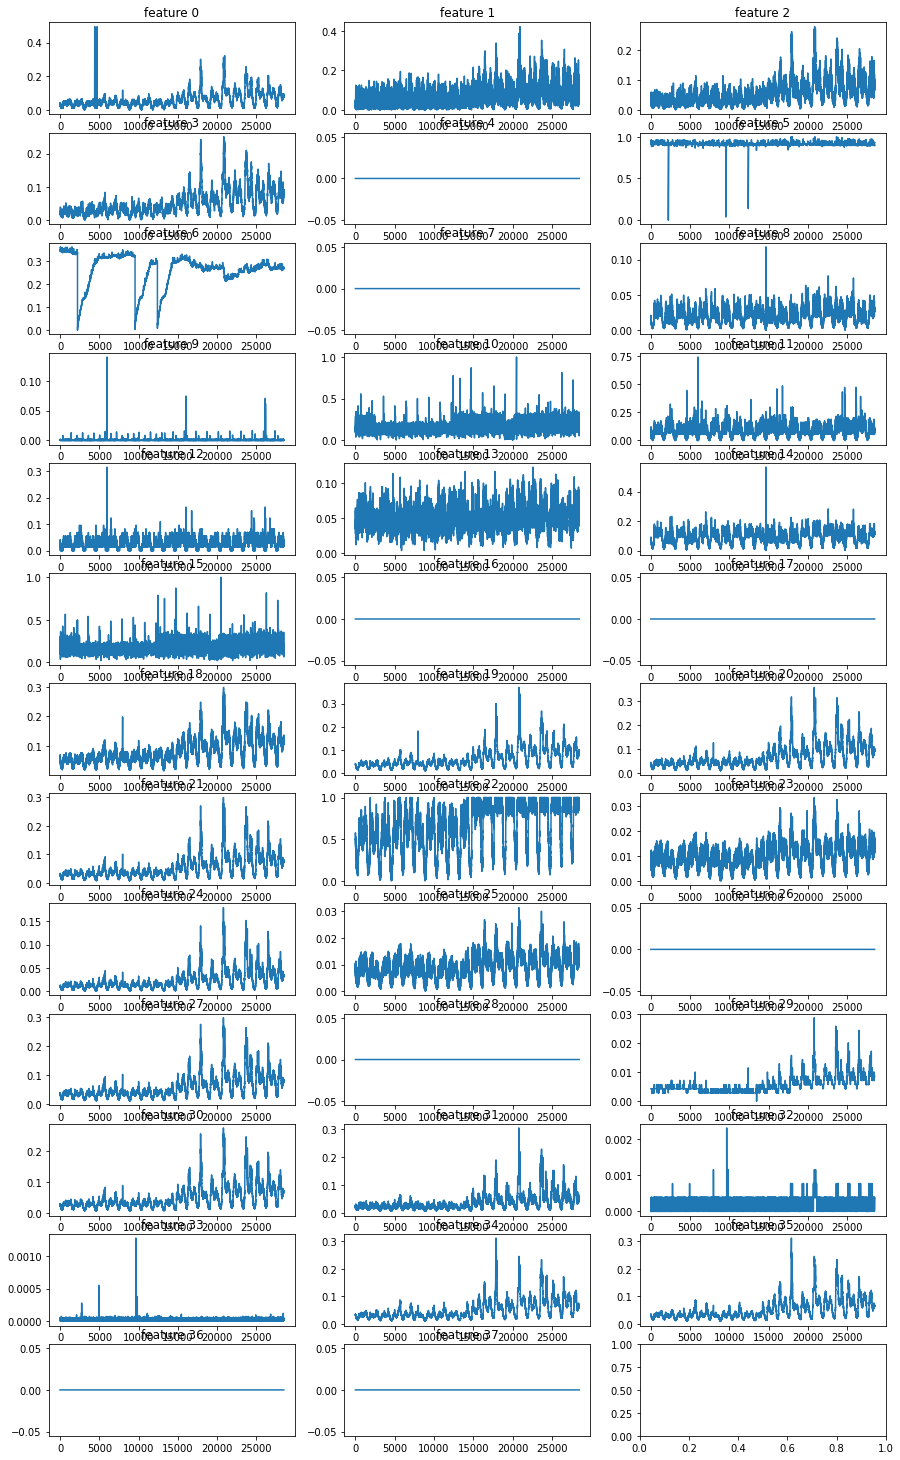

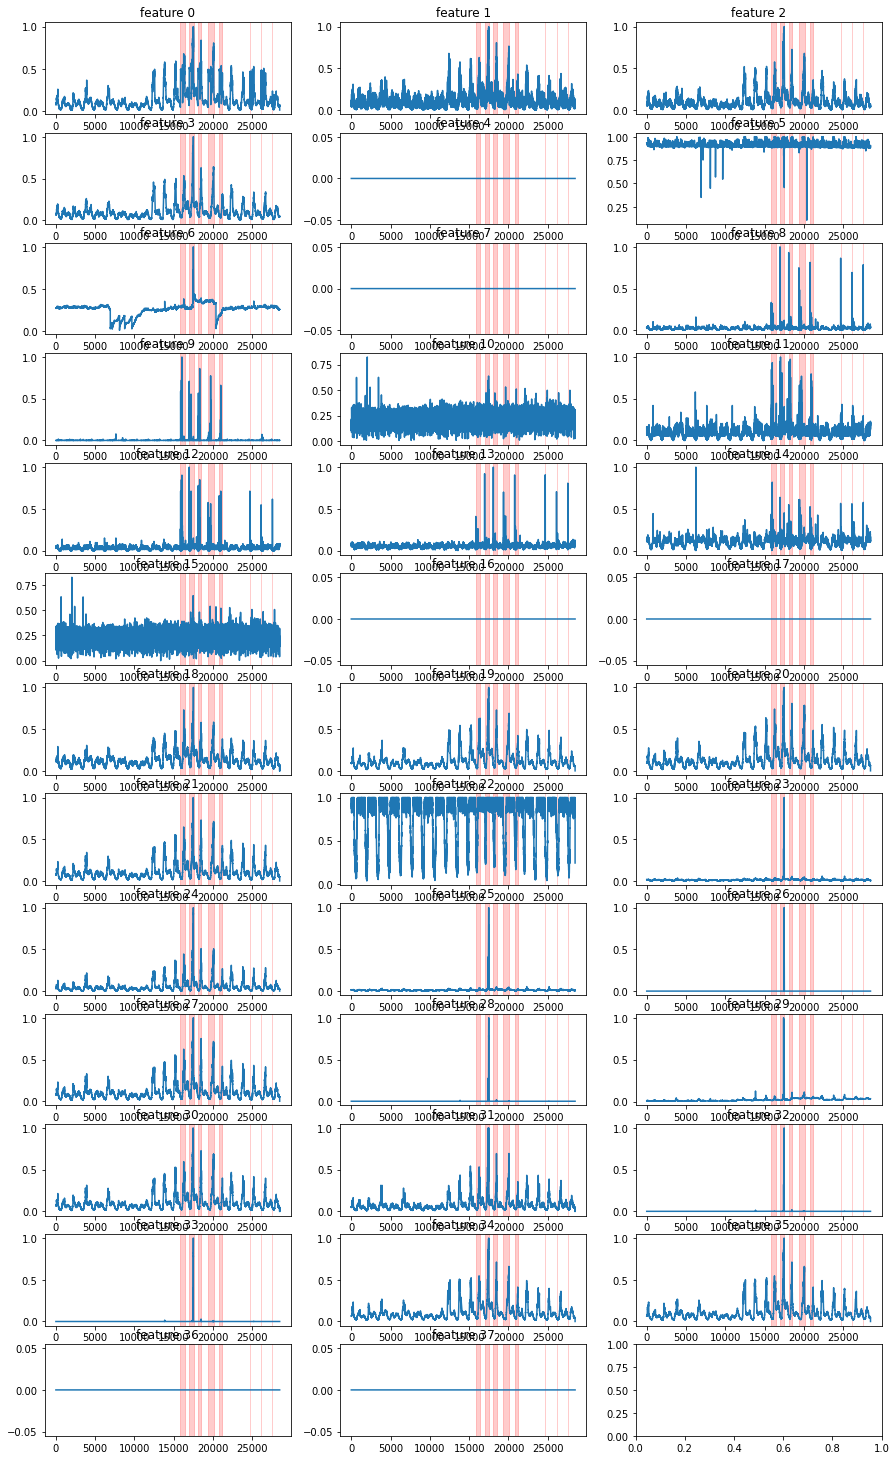

In [4]:
ds_name = 'machine-1-1'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-2

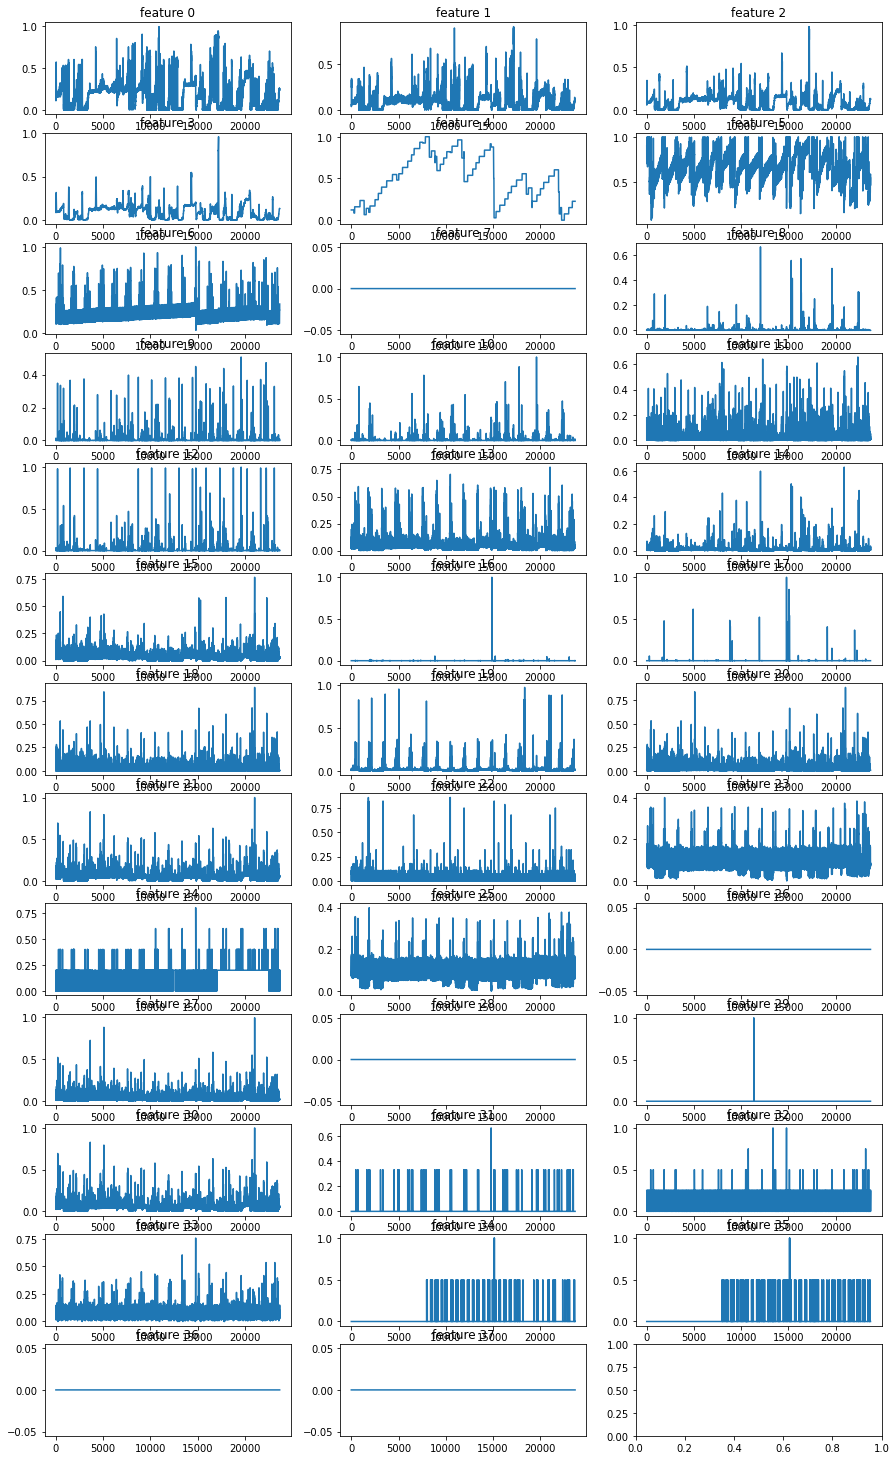

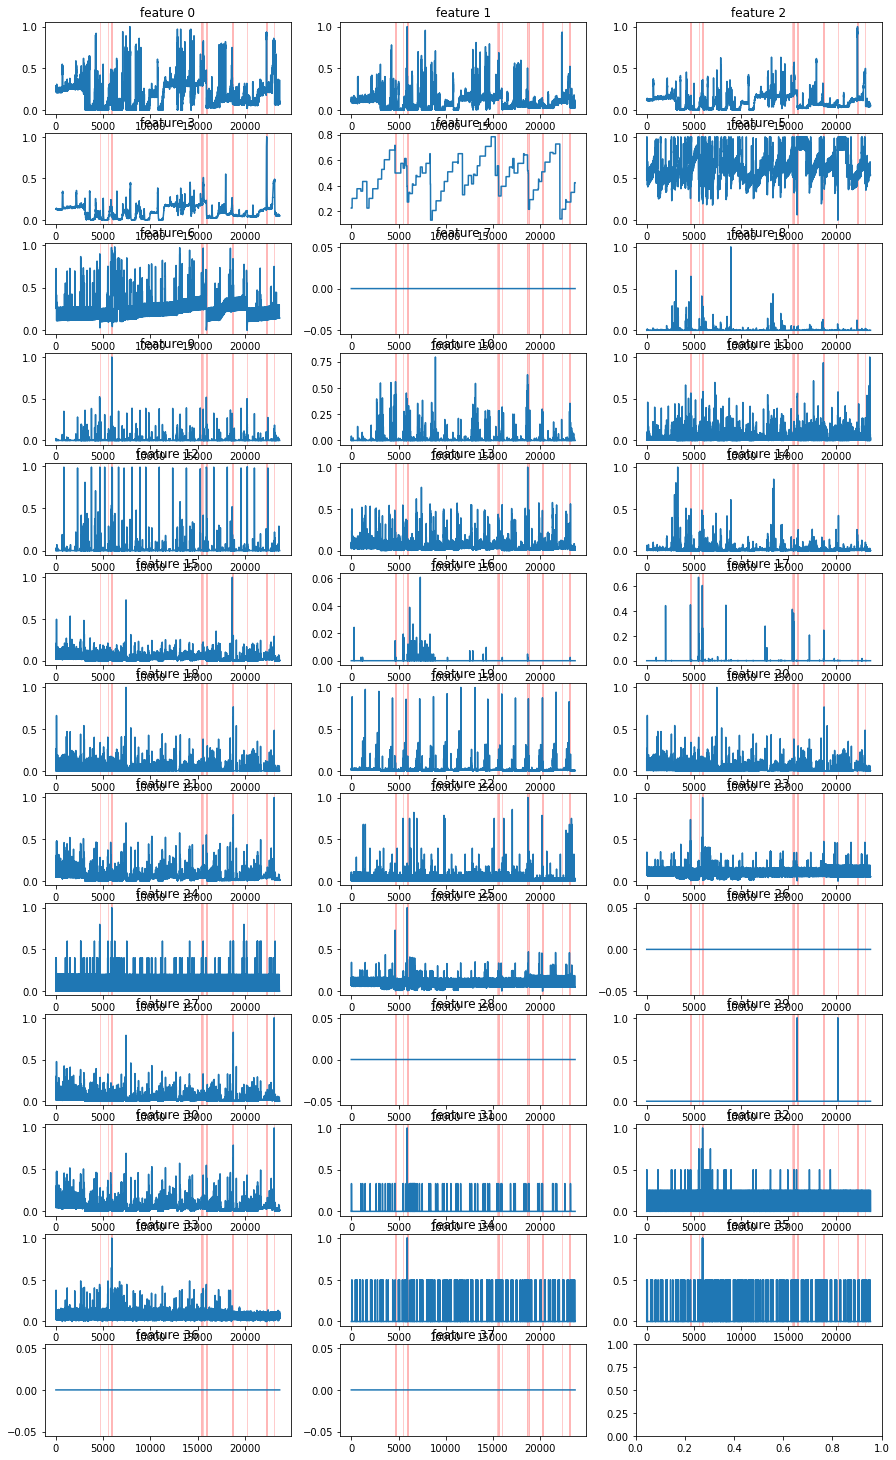

In [5]:
ds_name = 'machine-1-2'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-3

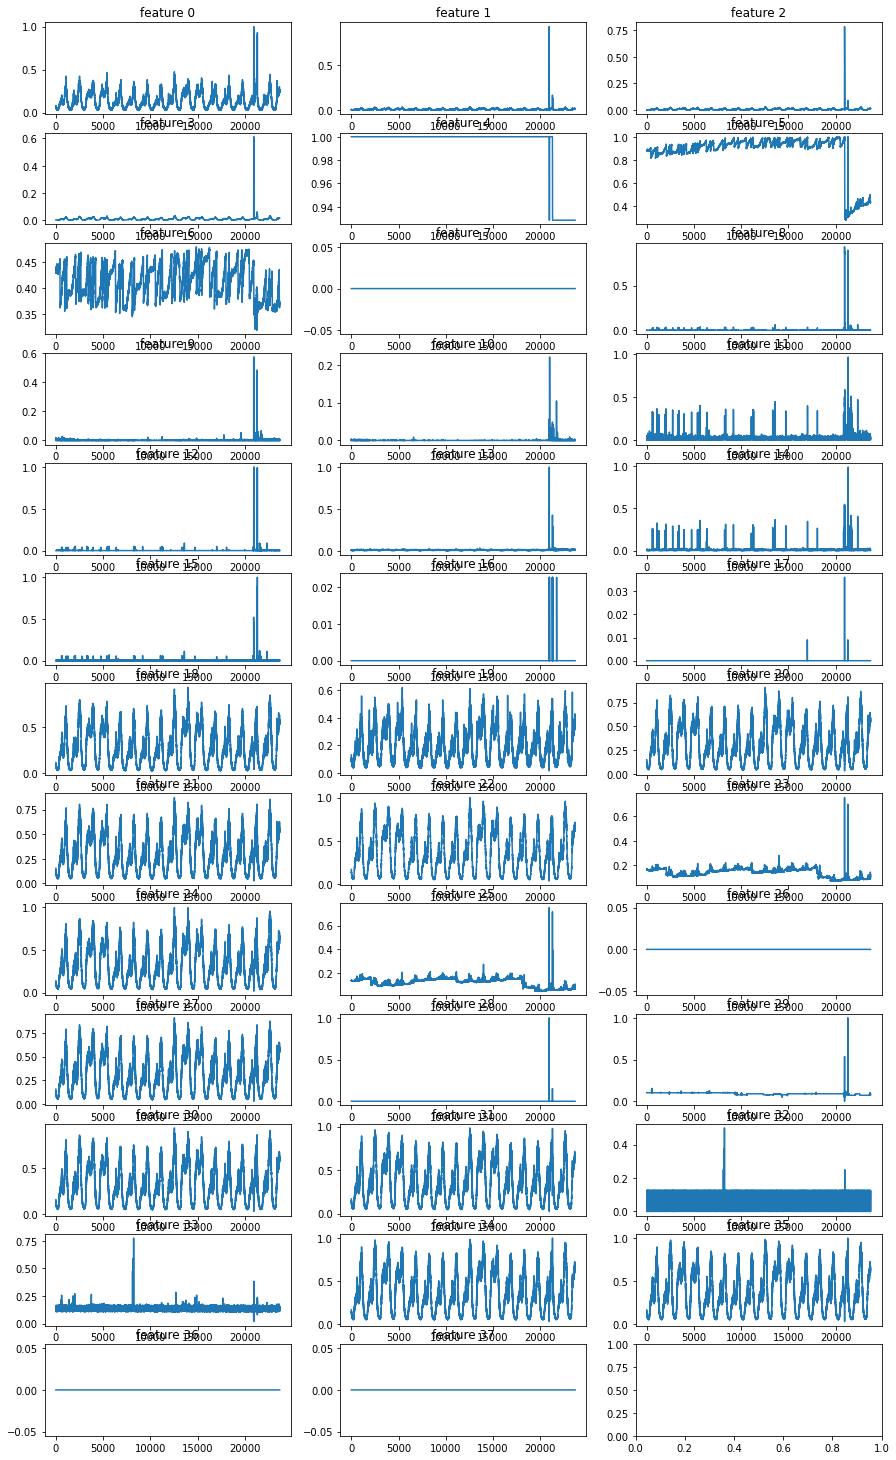

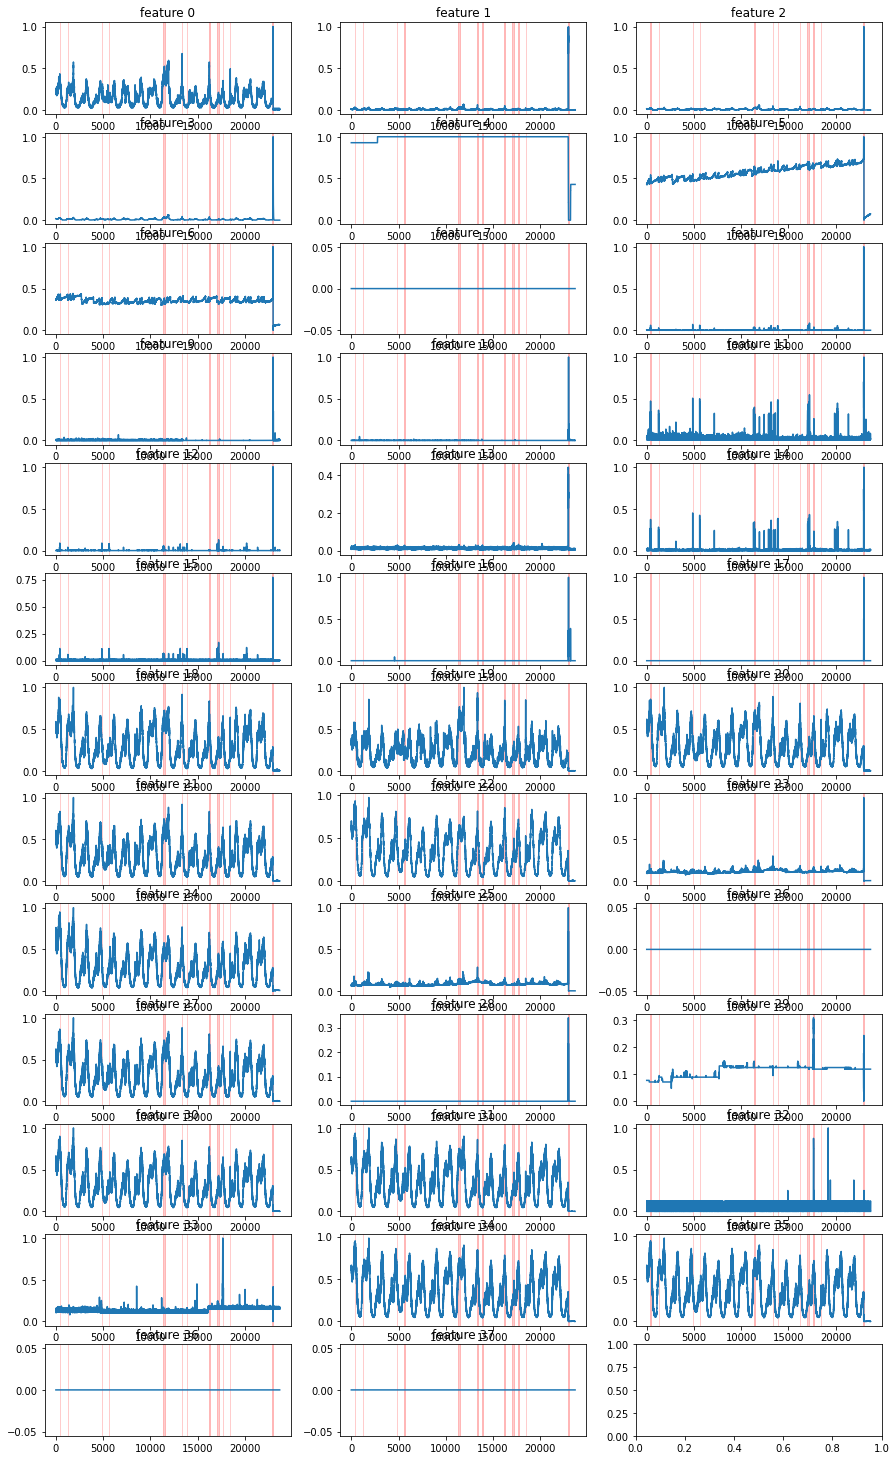

In [6]:
ds_name = 'machine-1-3'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-4

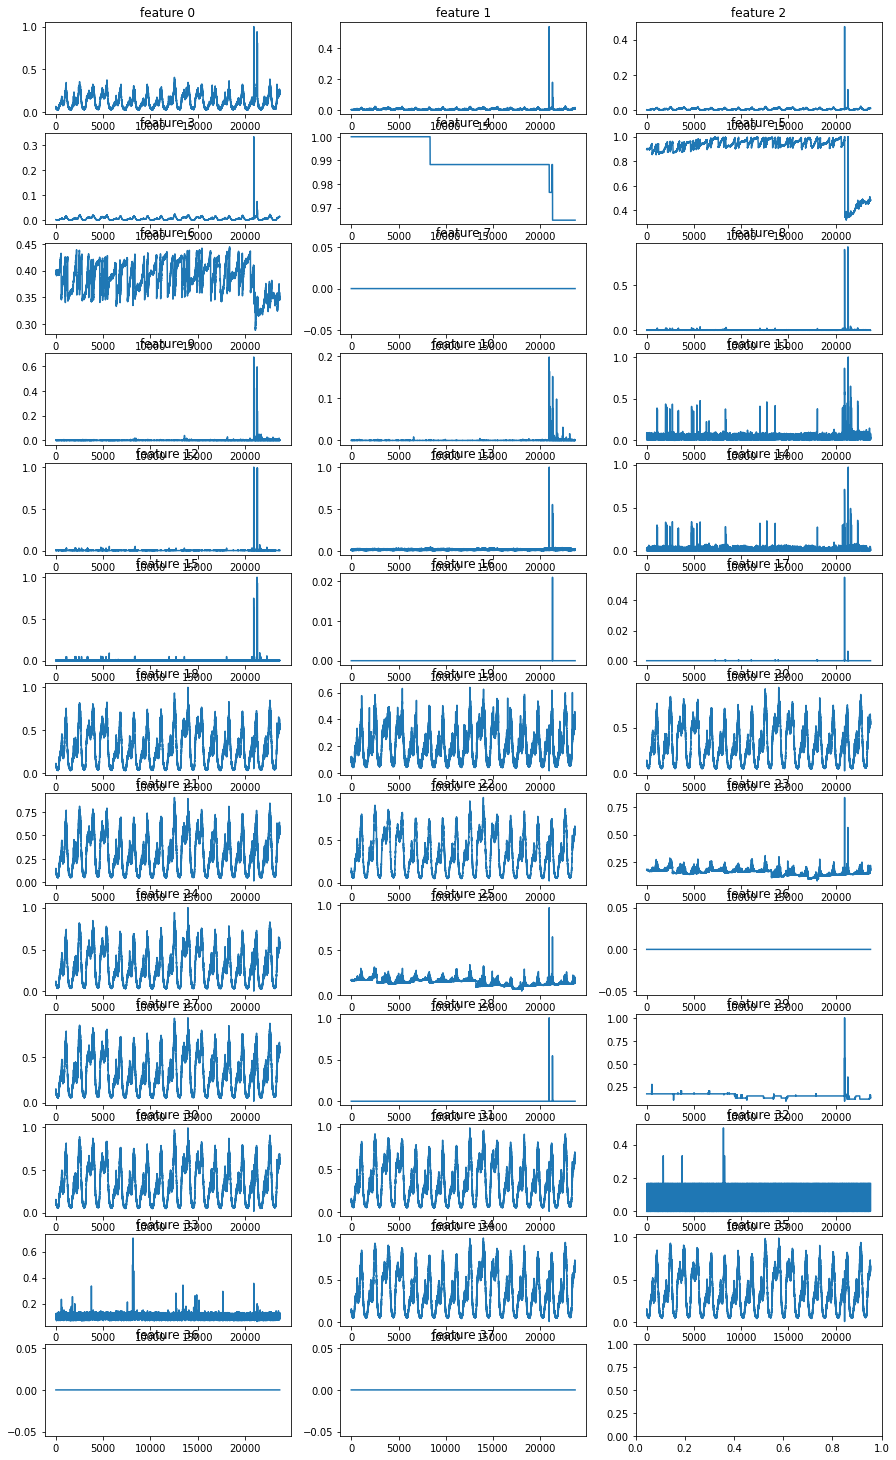

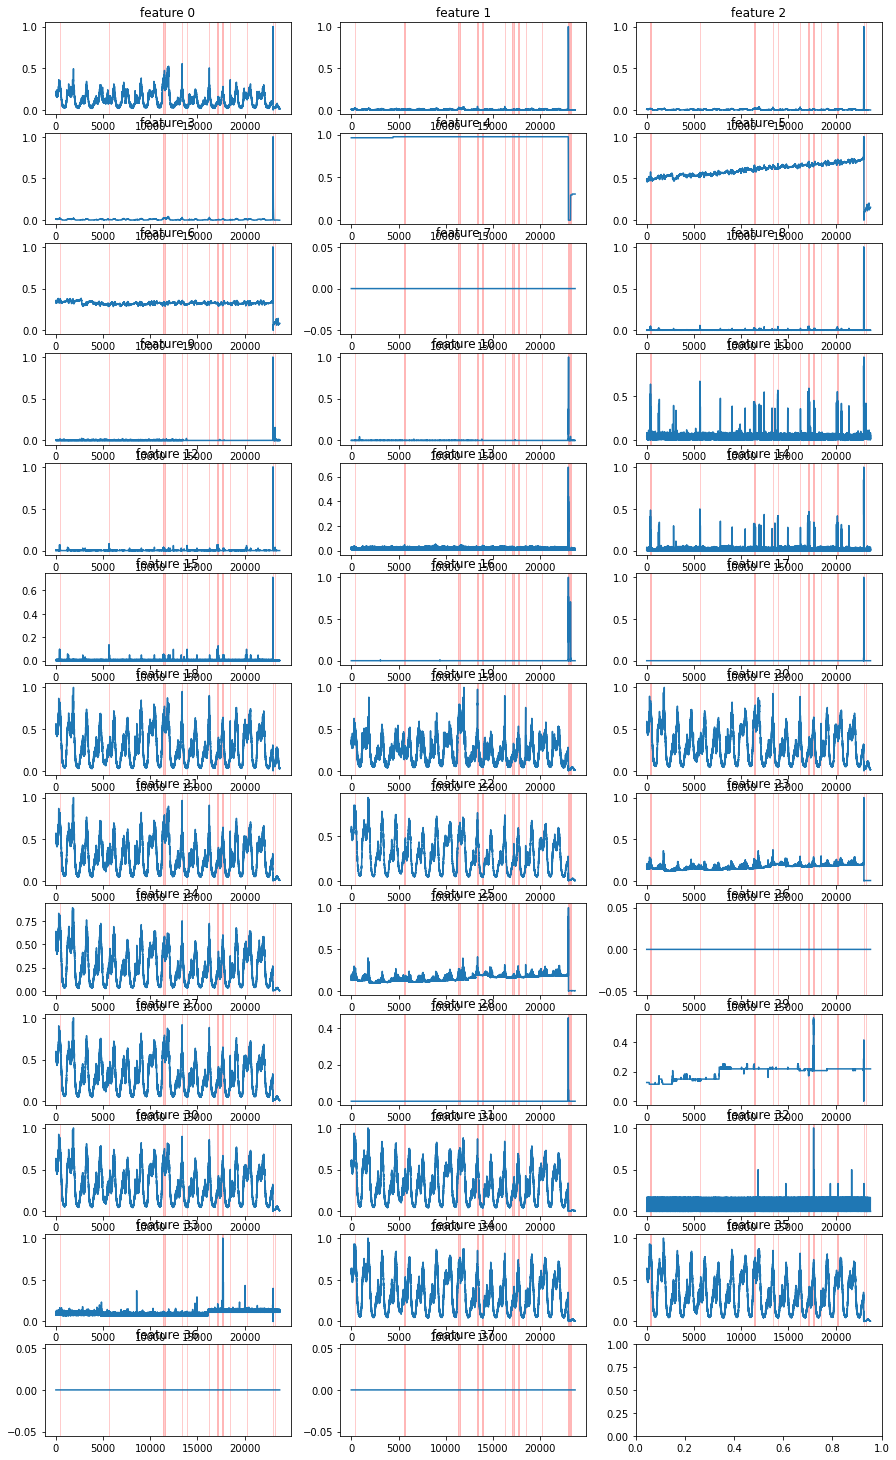

In [7]:
ds_name = 'machine-1-4'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-5

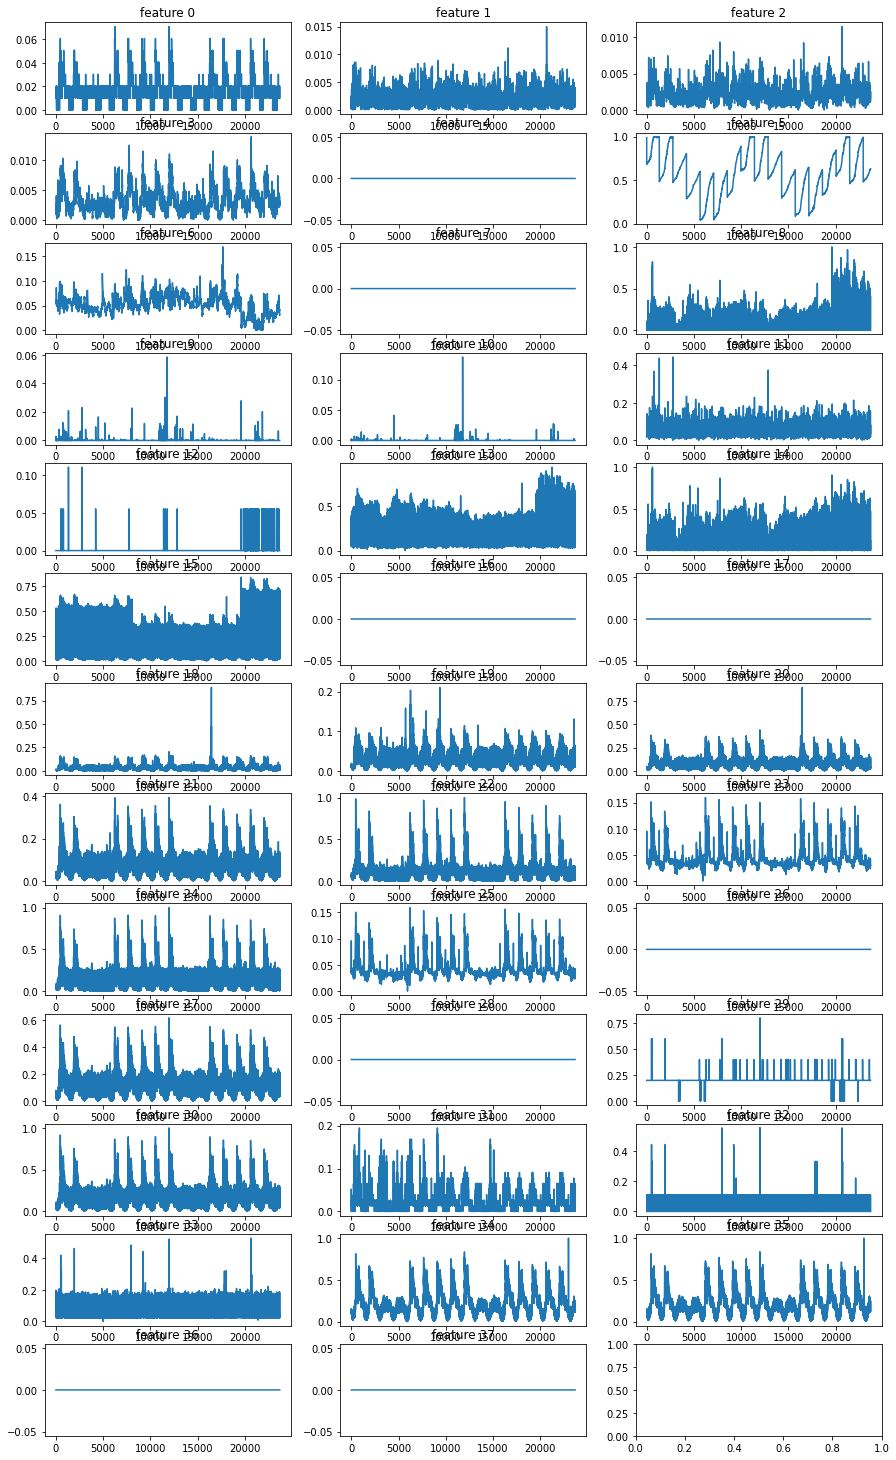

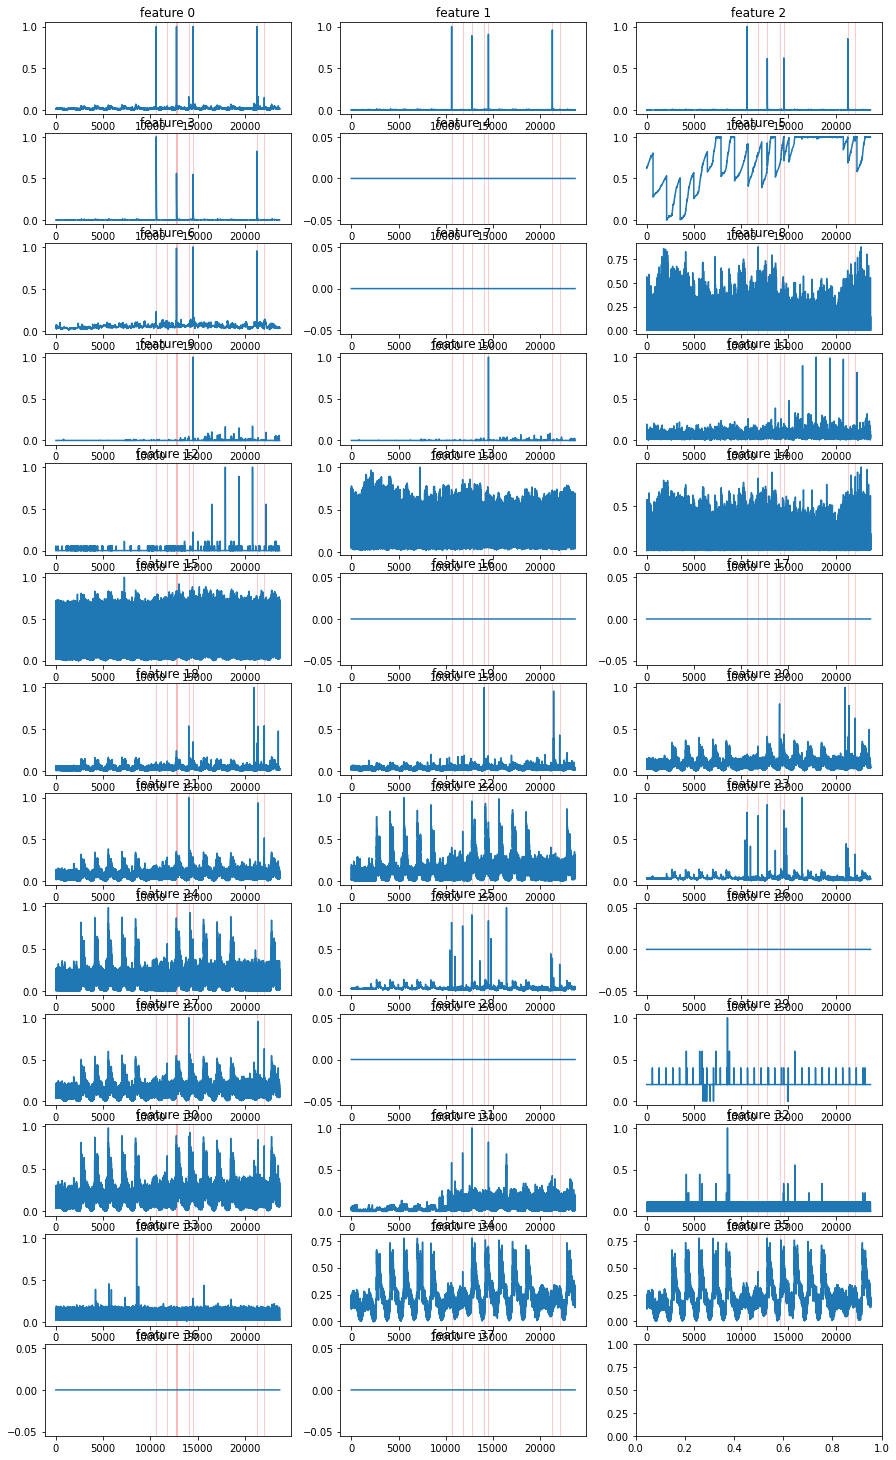

In [8]:
ds_name = 'machine-1-5'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-6

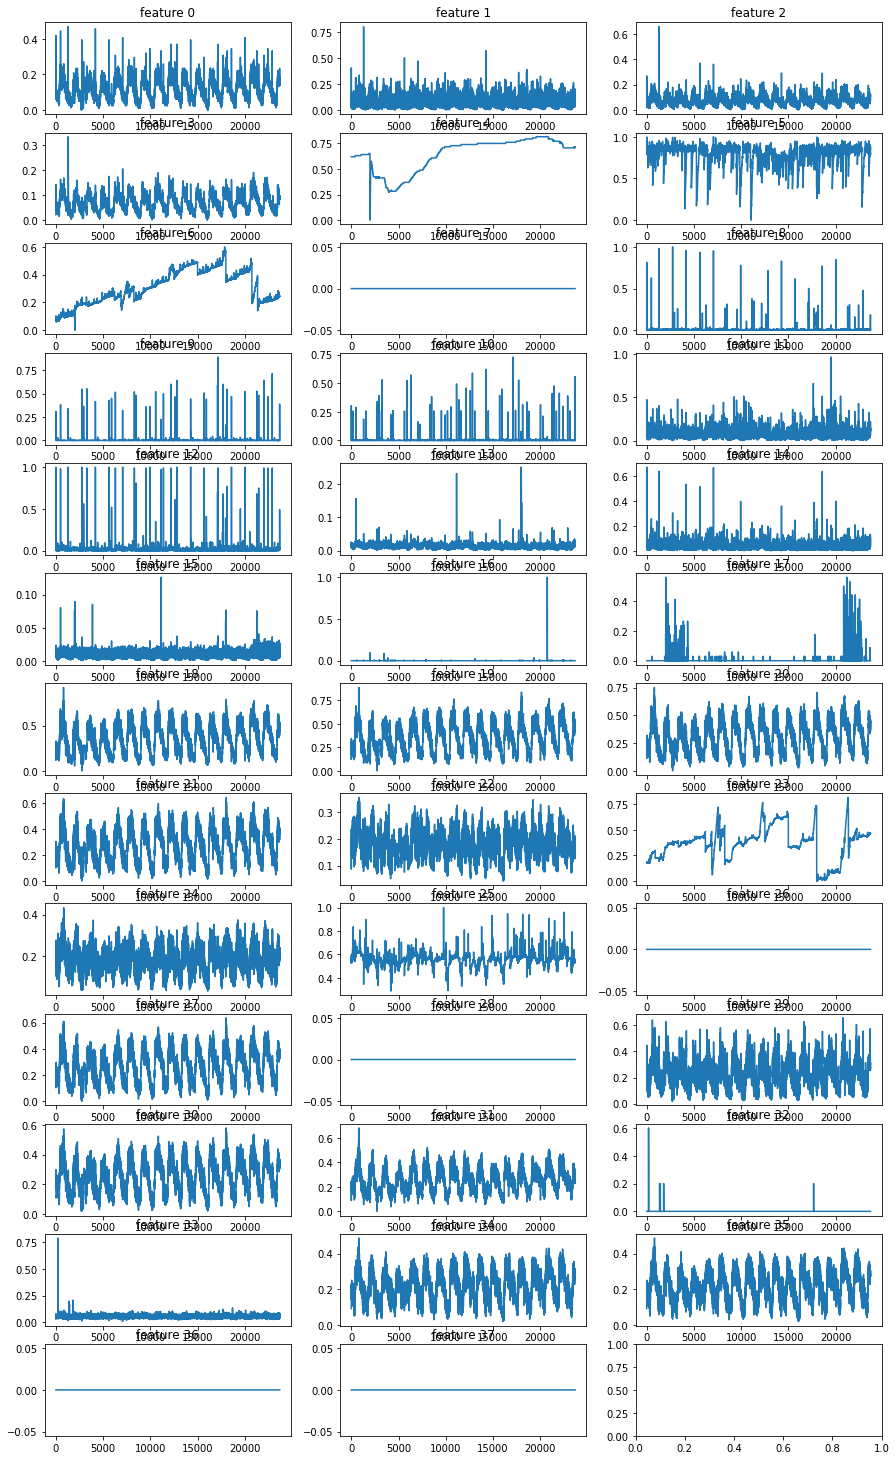

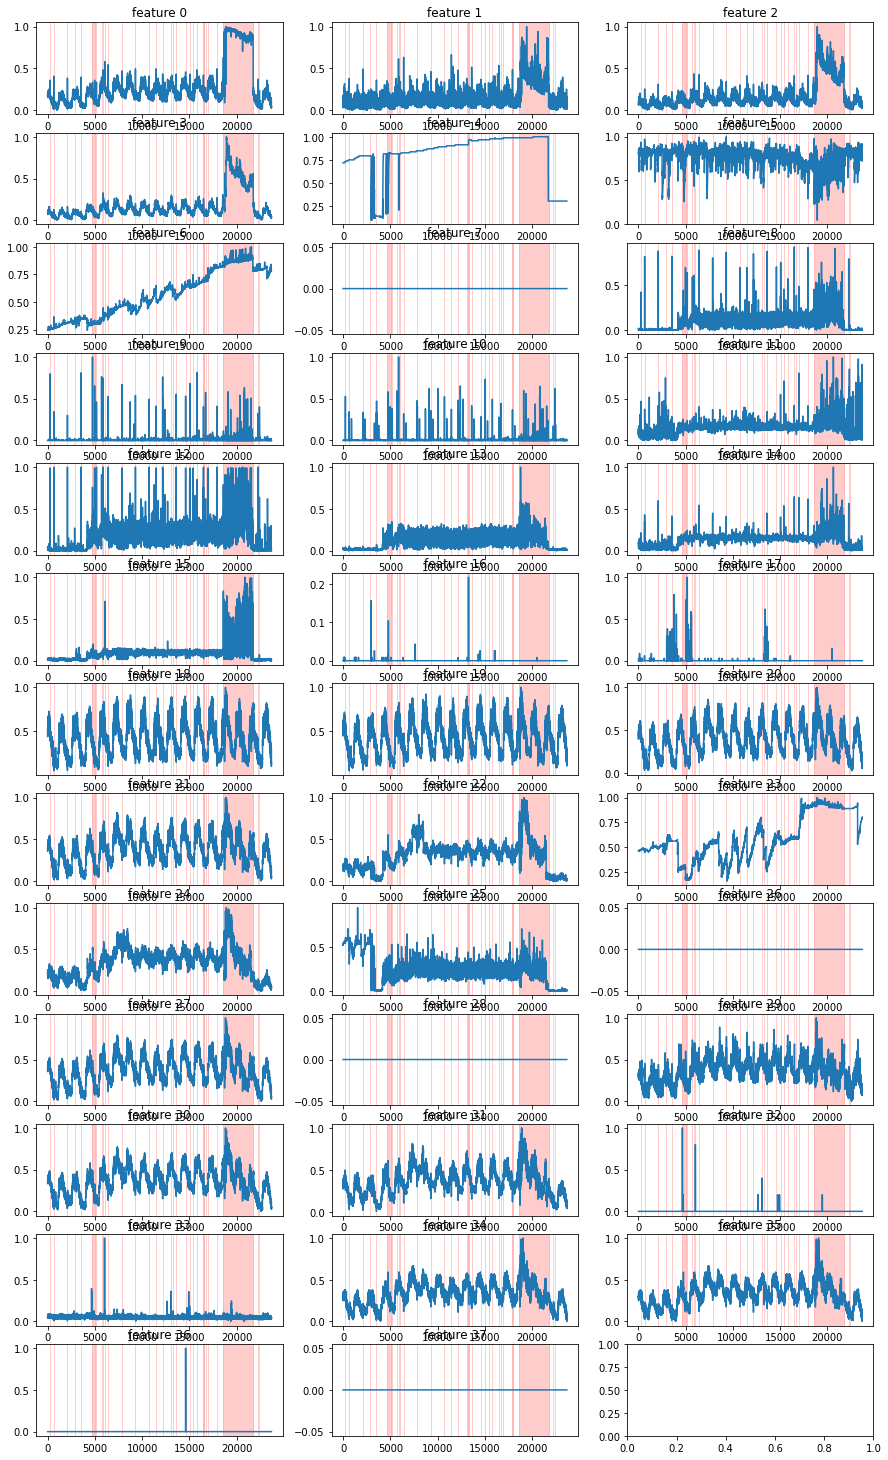

In [9]:
ds_name = 'machine-1-6'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-7

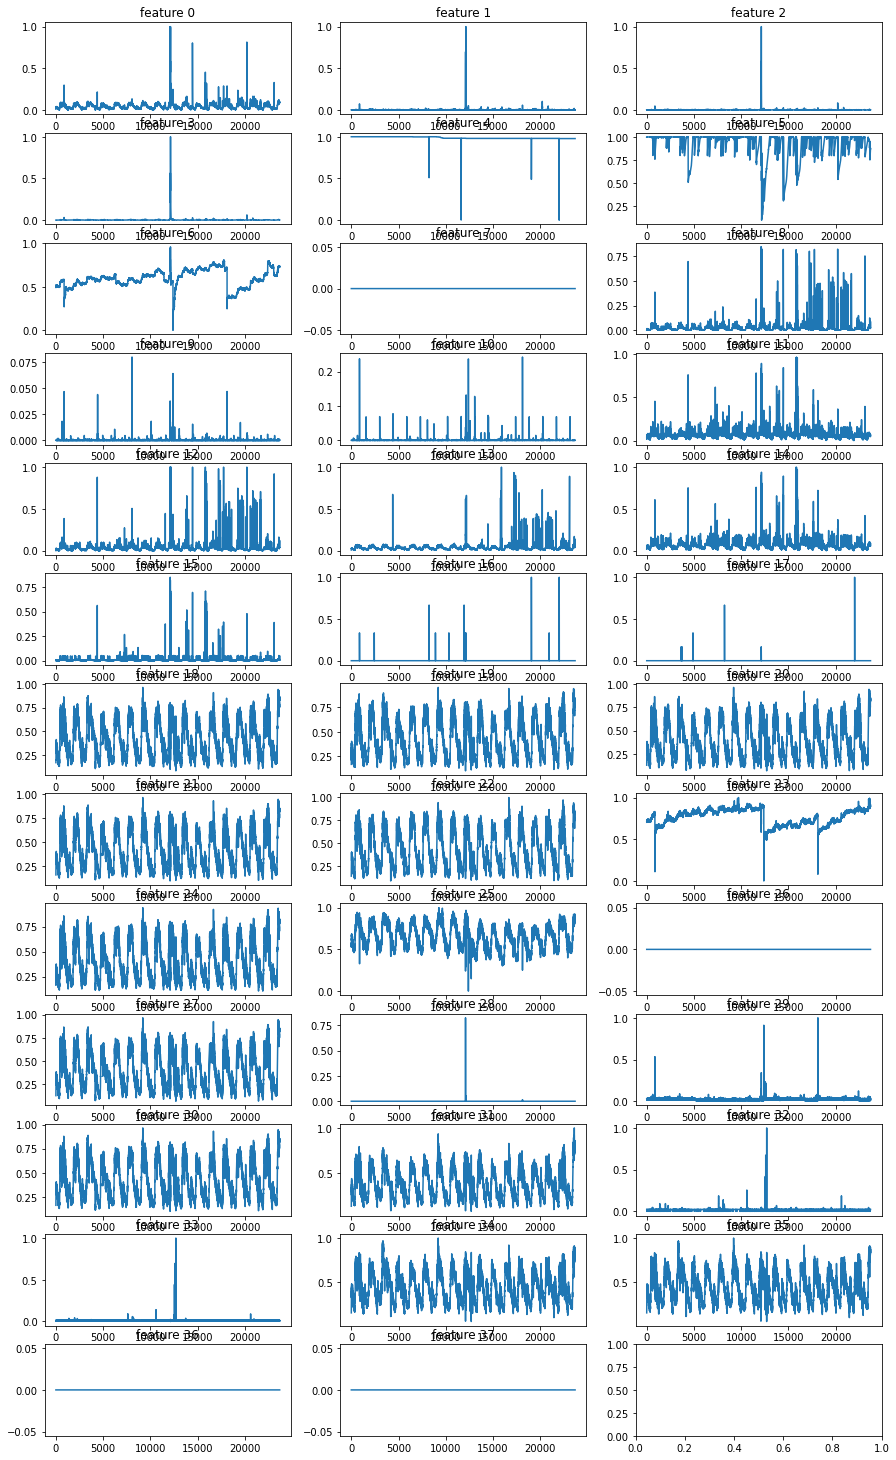

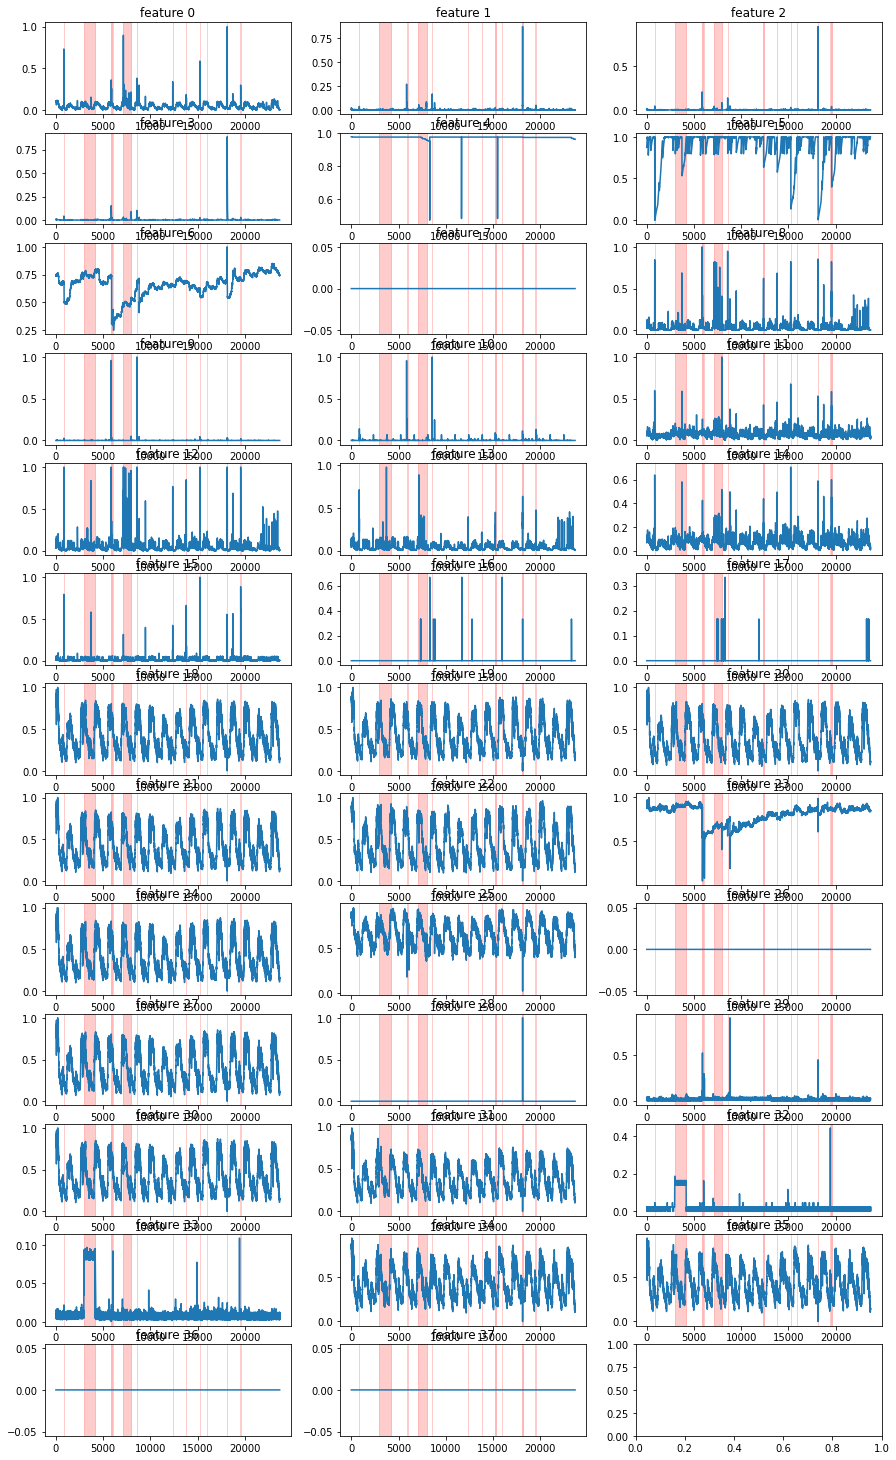

In [10]:
ds_name = 'machine-1-7'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-1-8

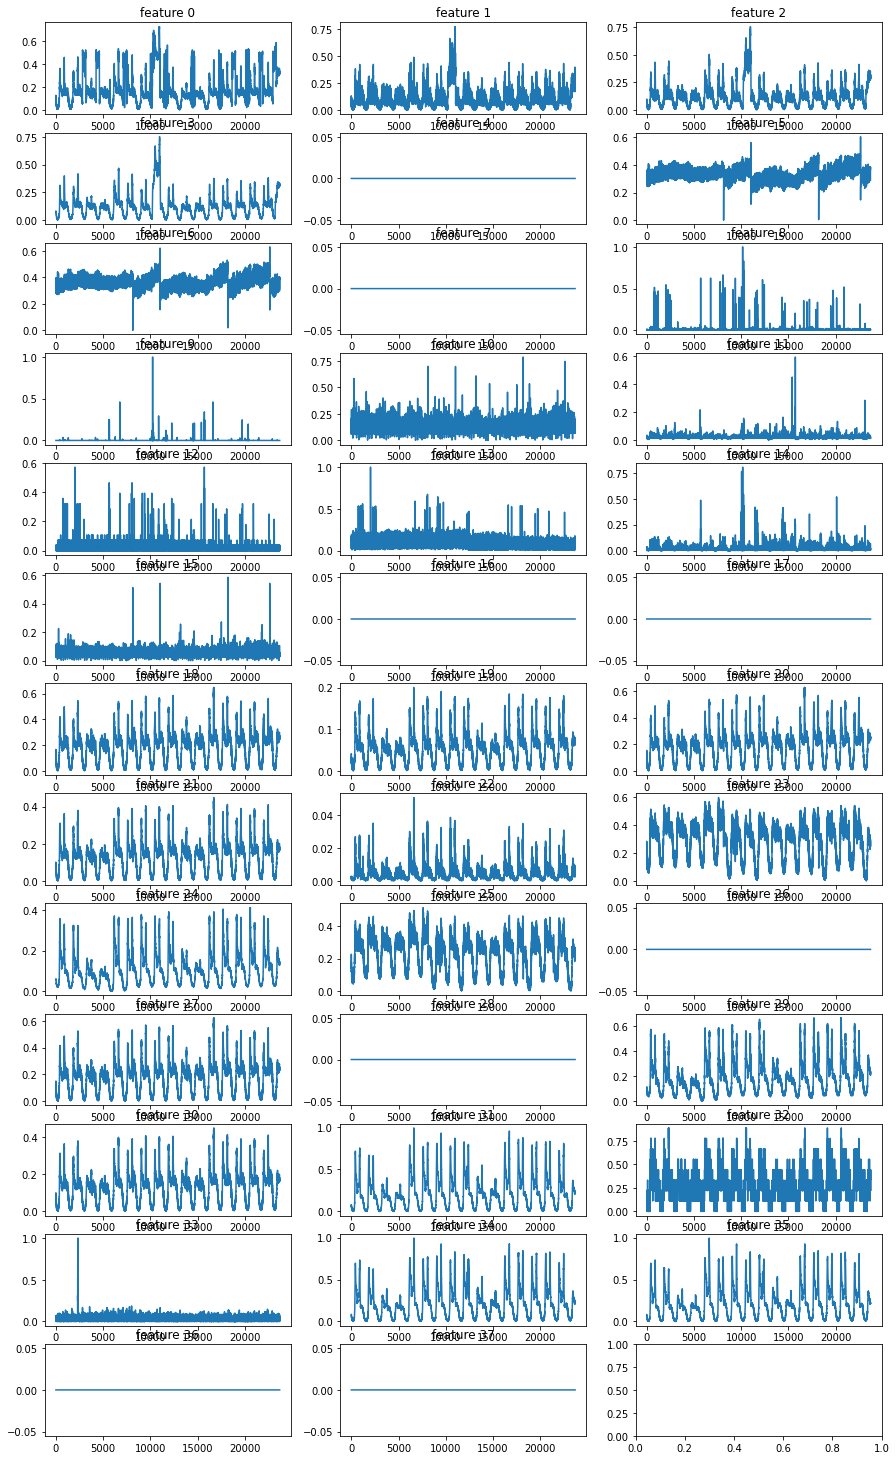

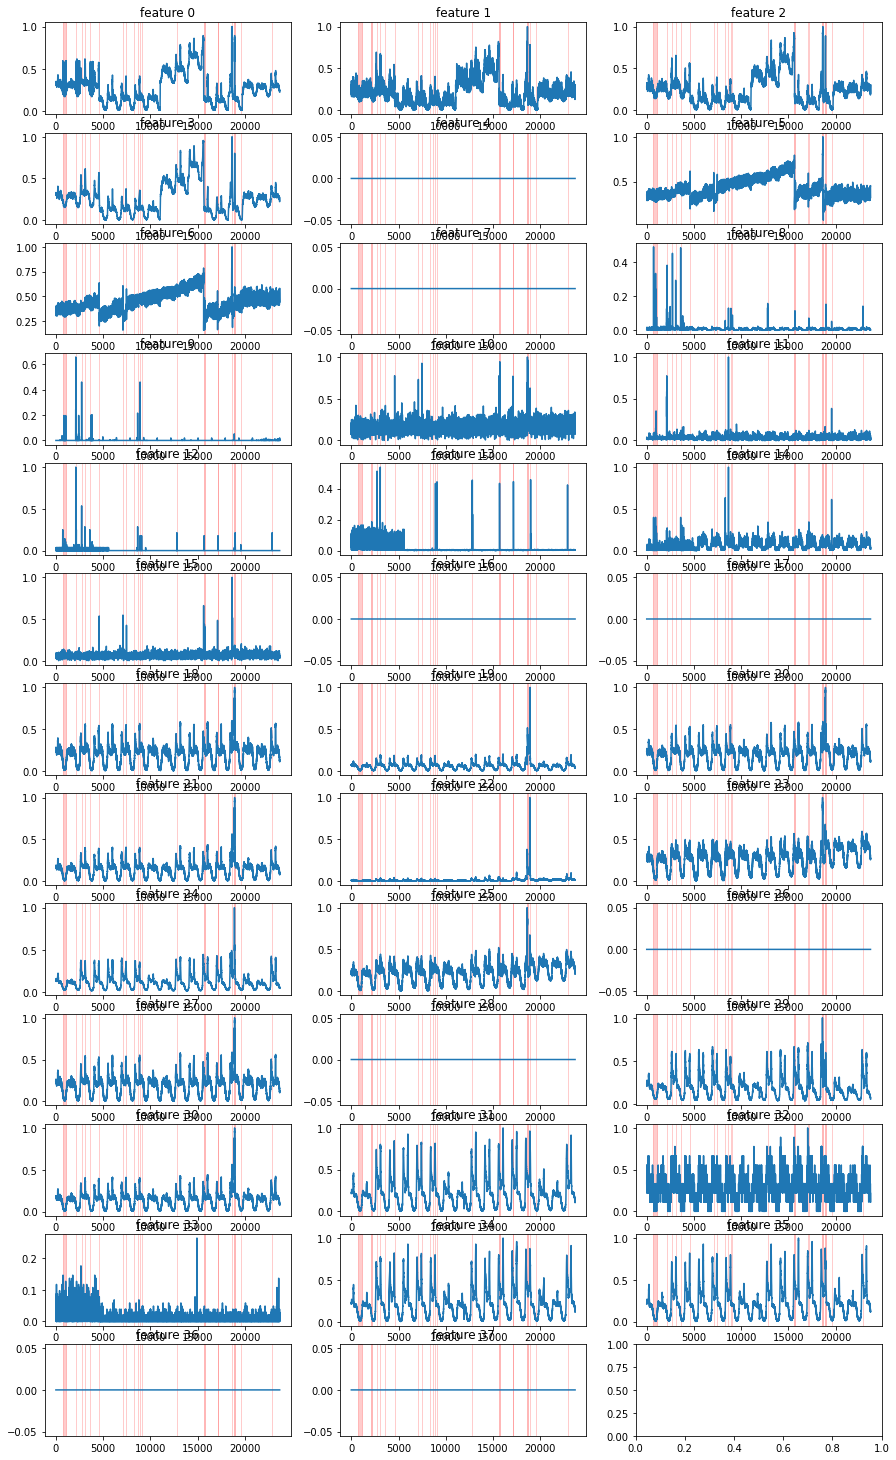

In [11]:
ds_name = 'machine-1-8'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

## Group 2

### Machine-2-1

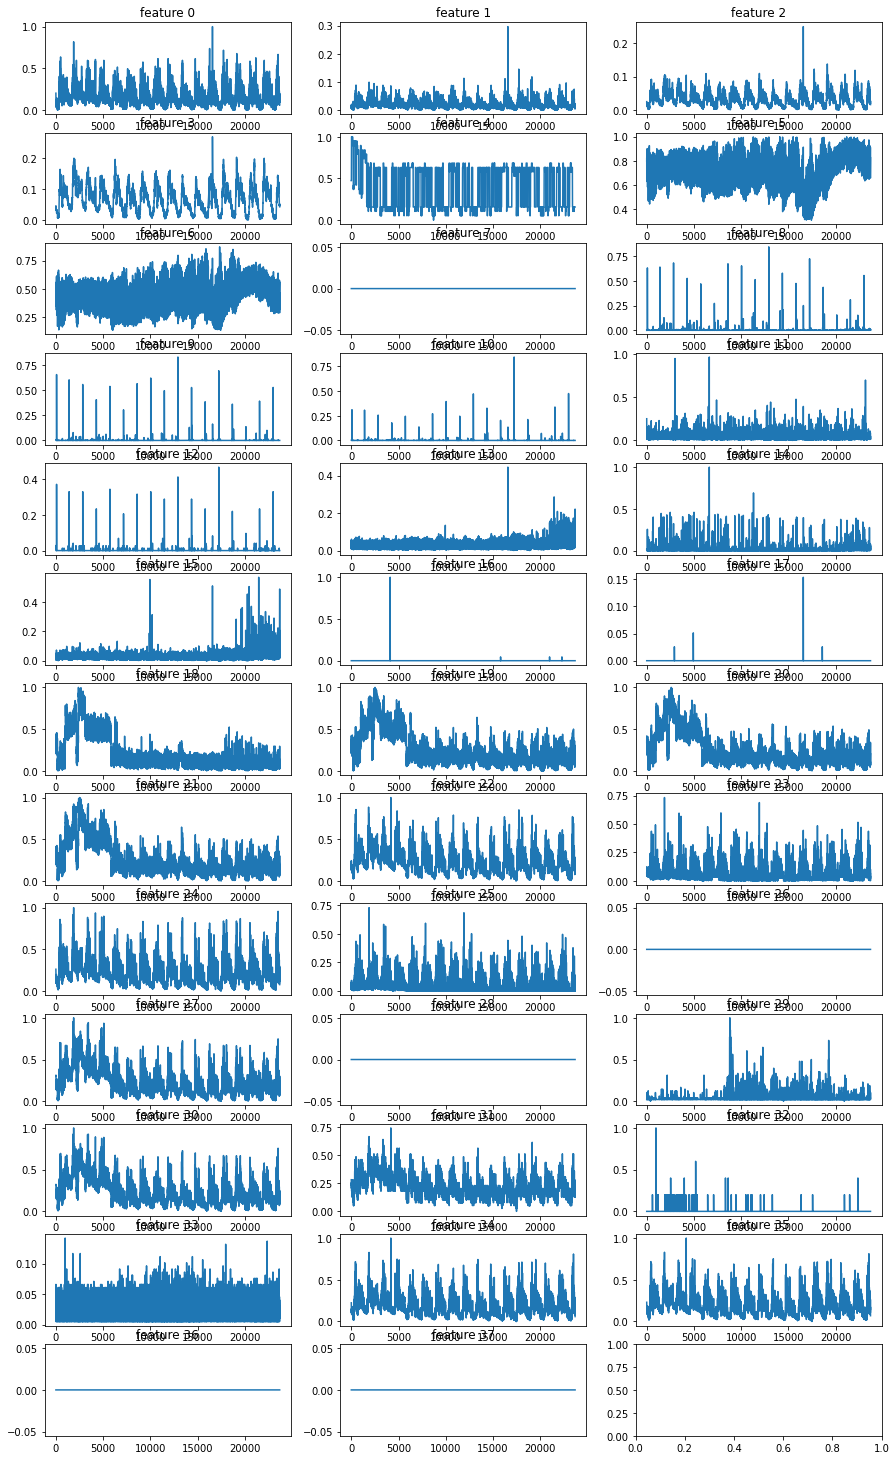

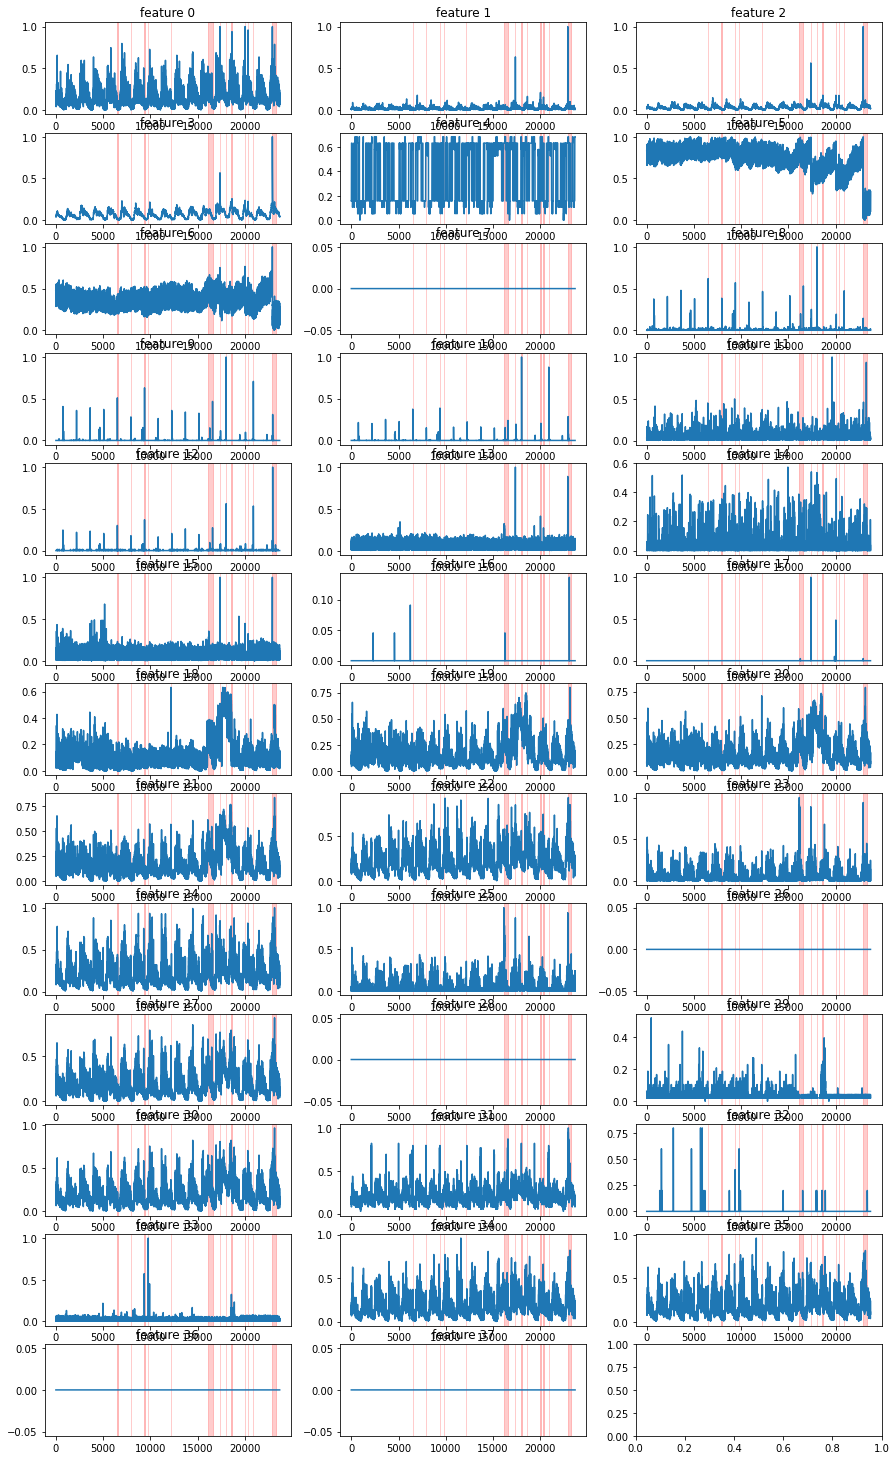

In [12]:
ds_name = 'machine-2-1'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-2

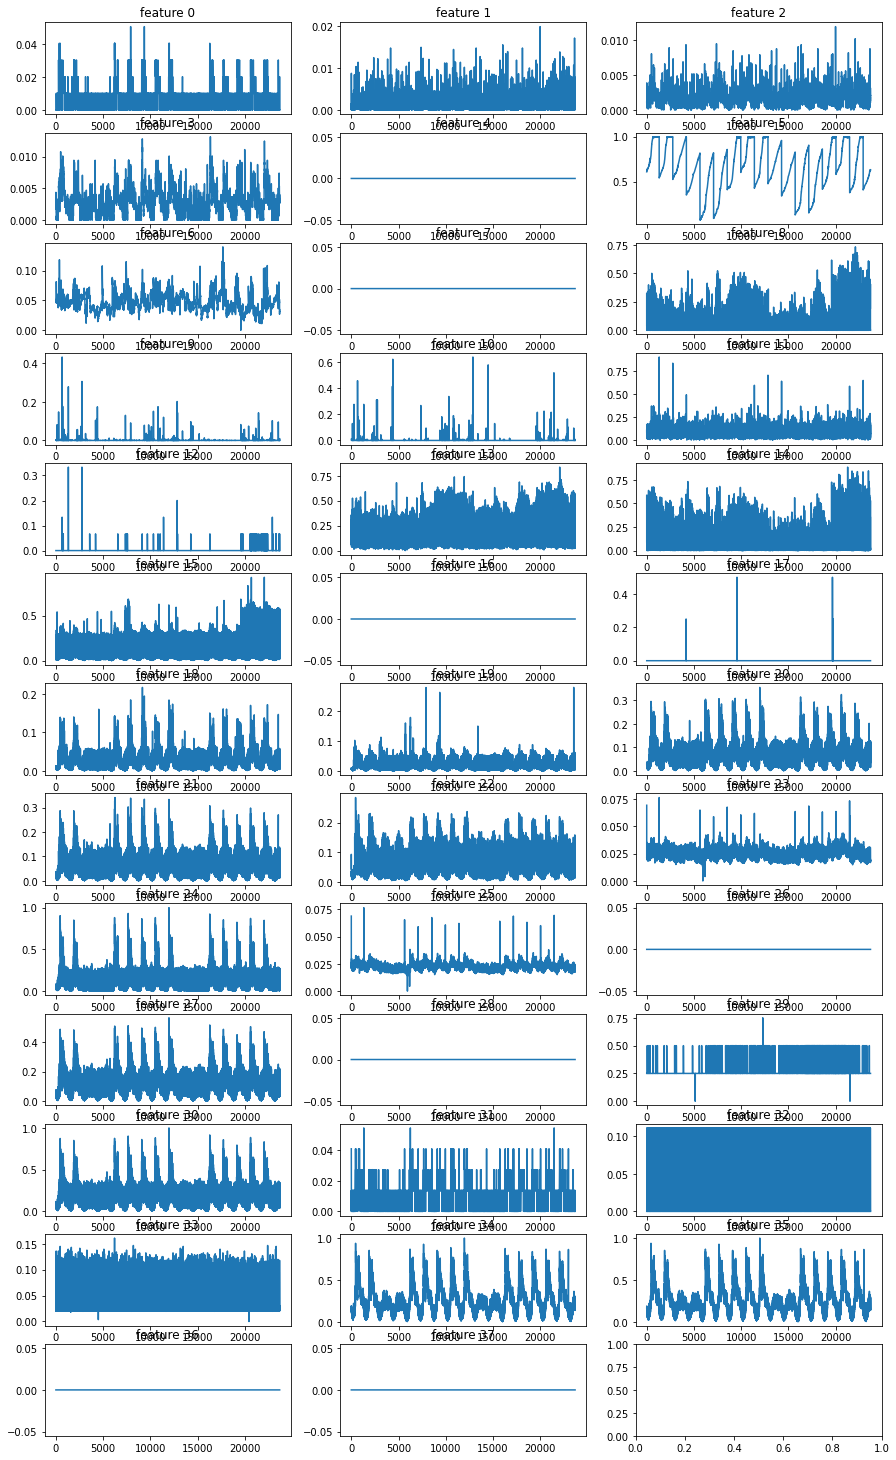

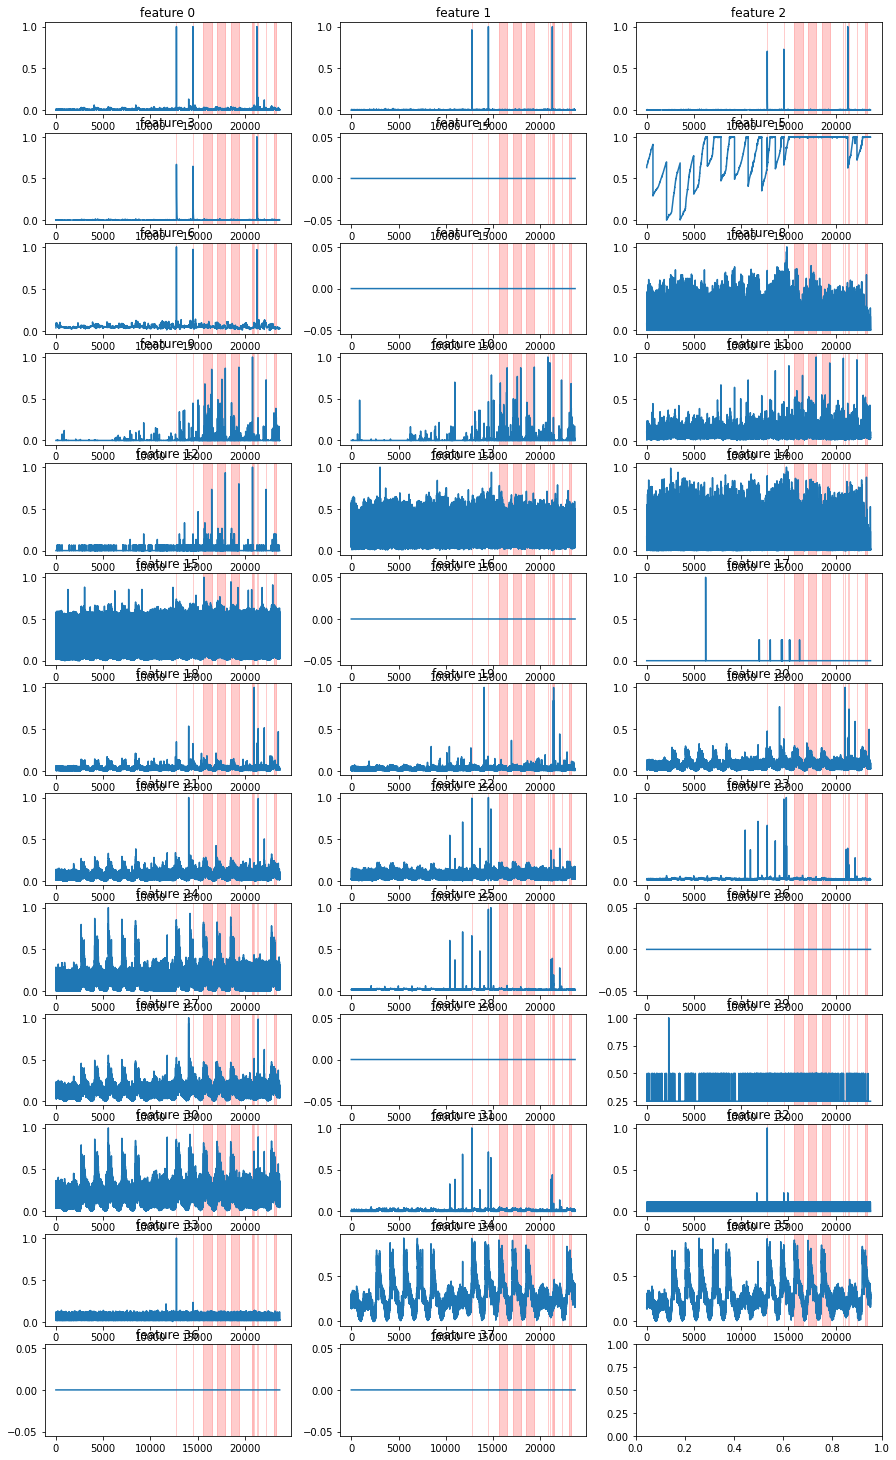

In [13]:
ds_name = 'machine-2-2'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-3

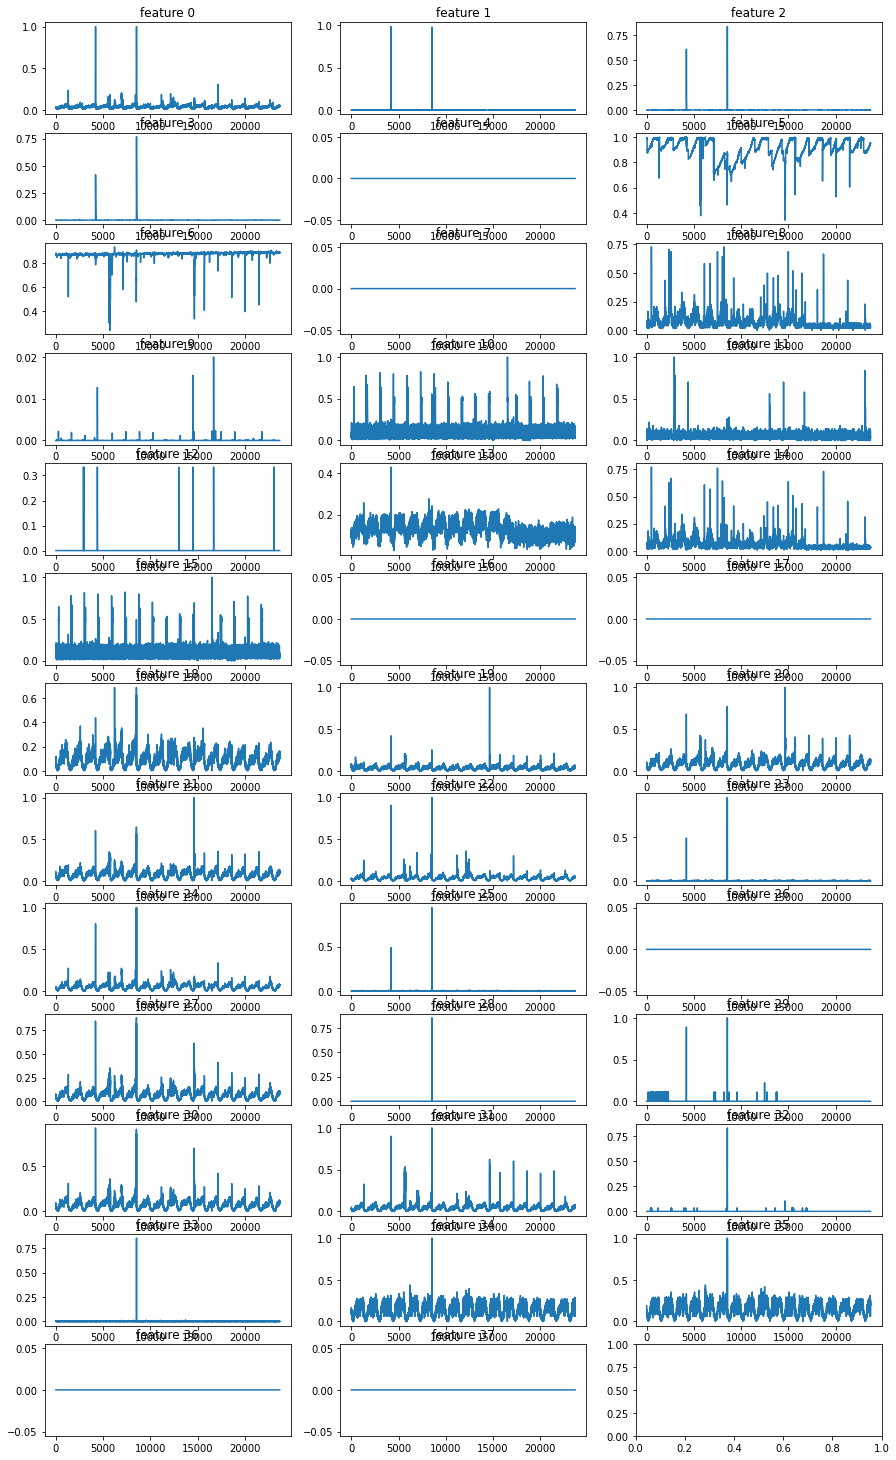

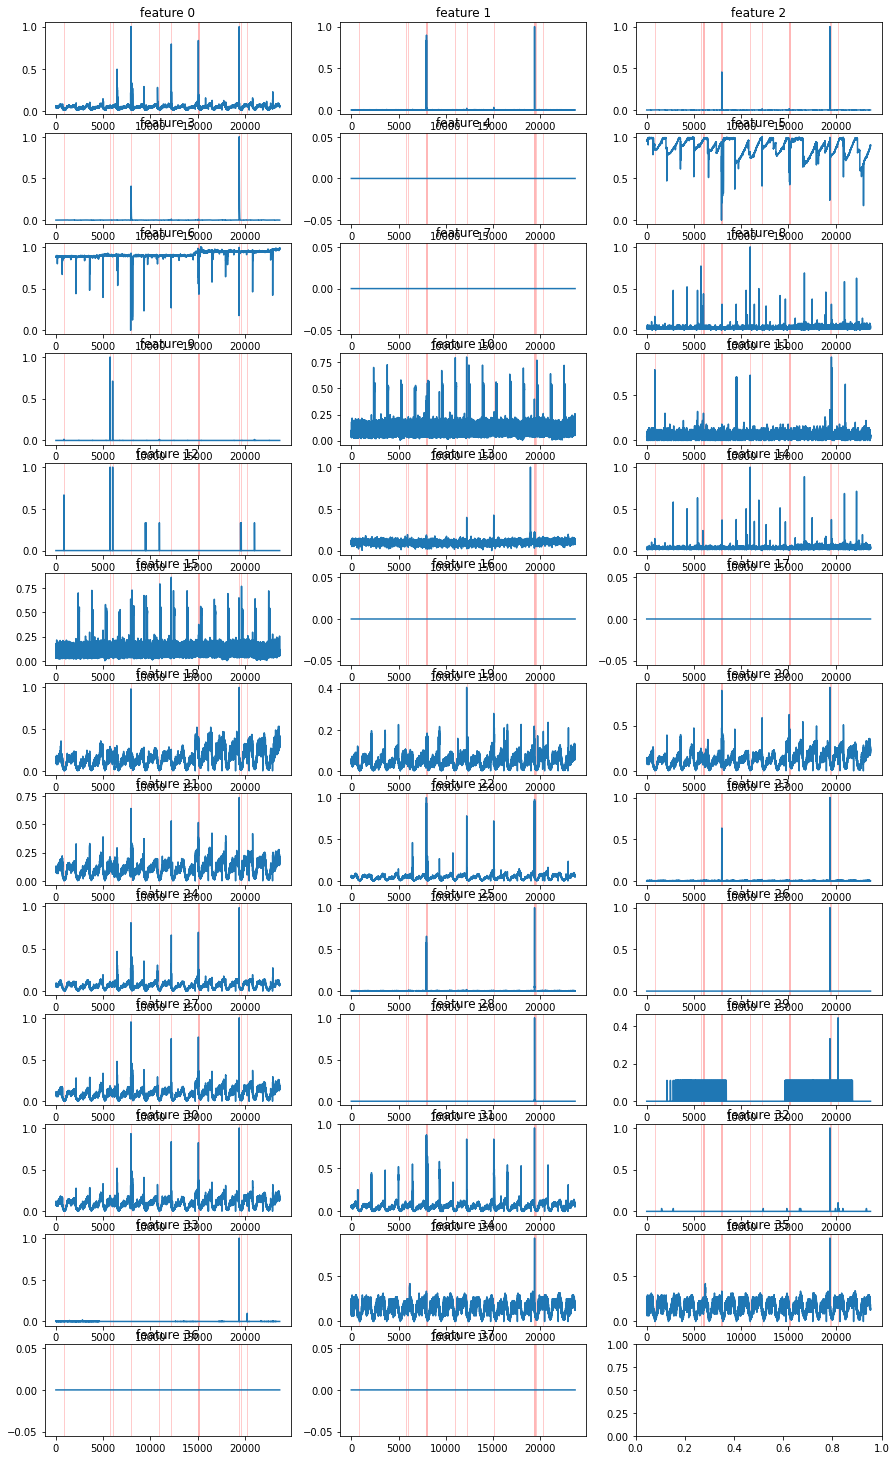

In [14]:
ds_name = 'machine-2-3'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-4

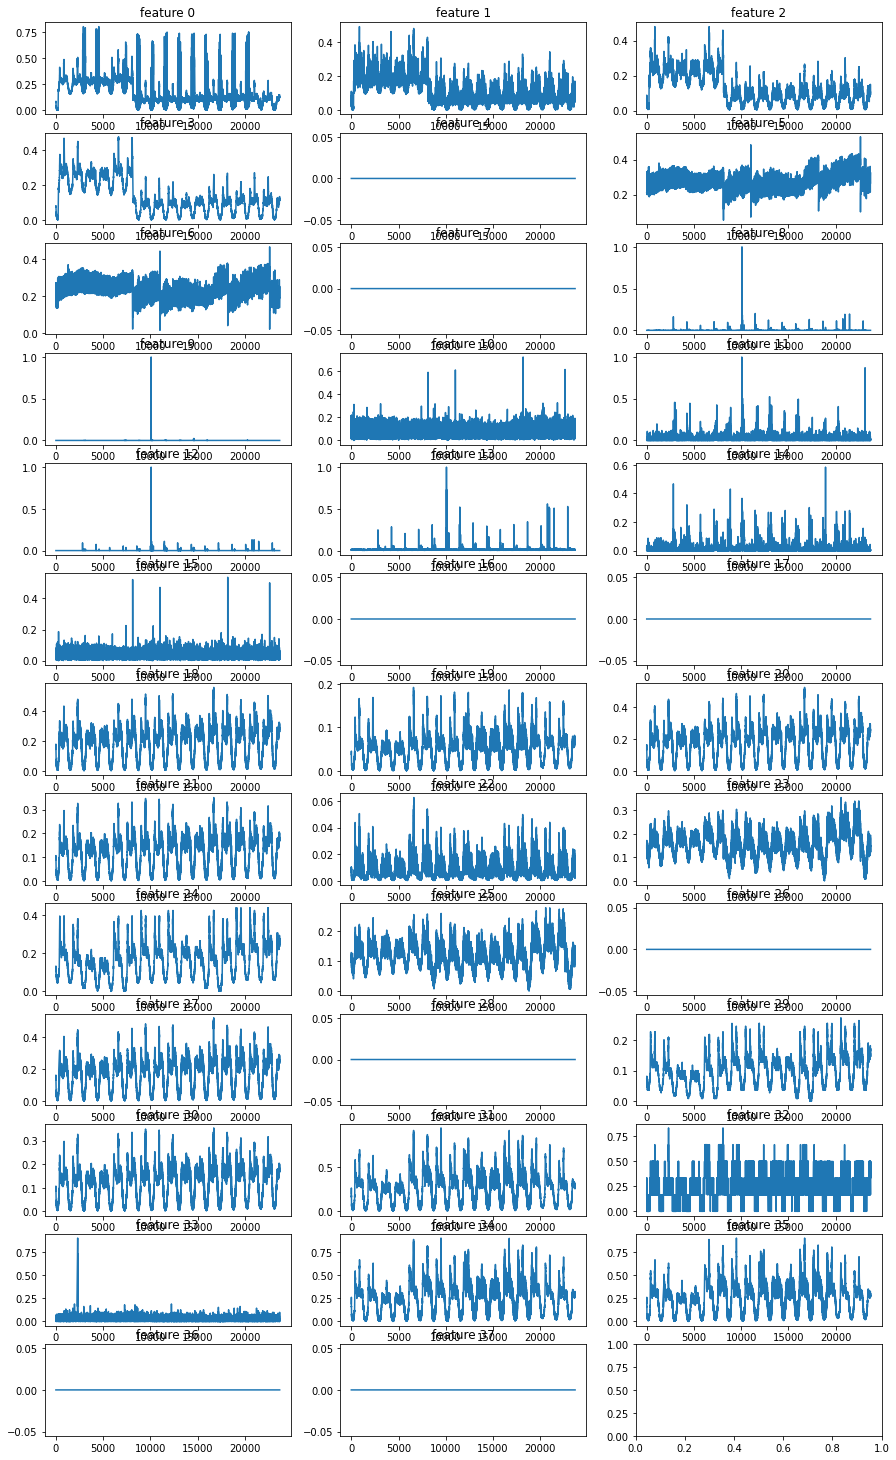

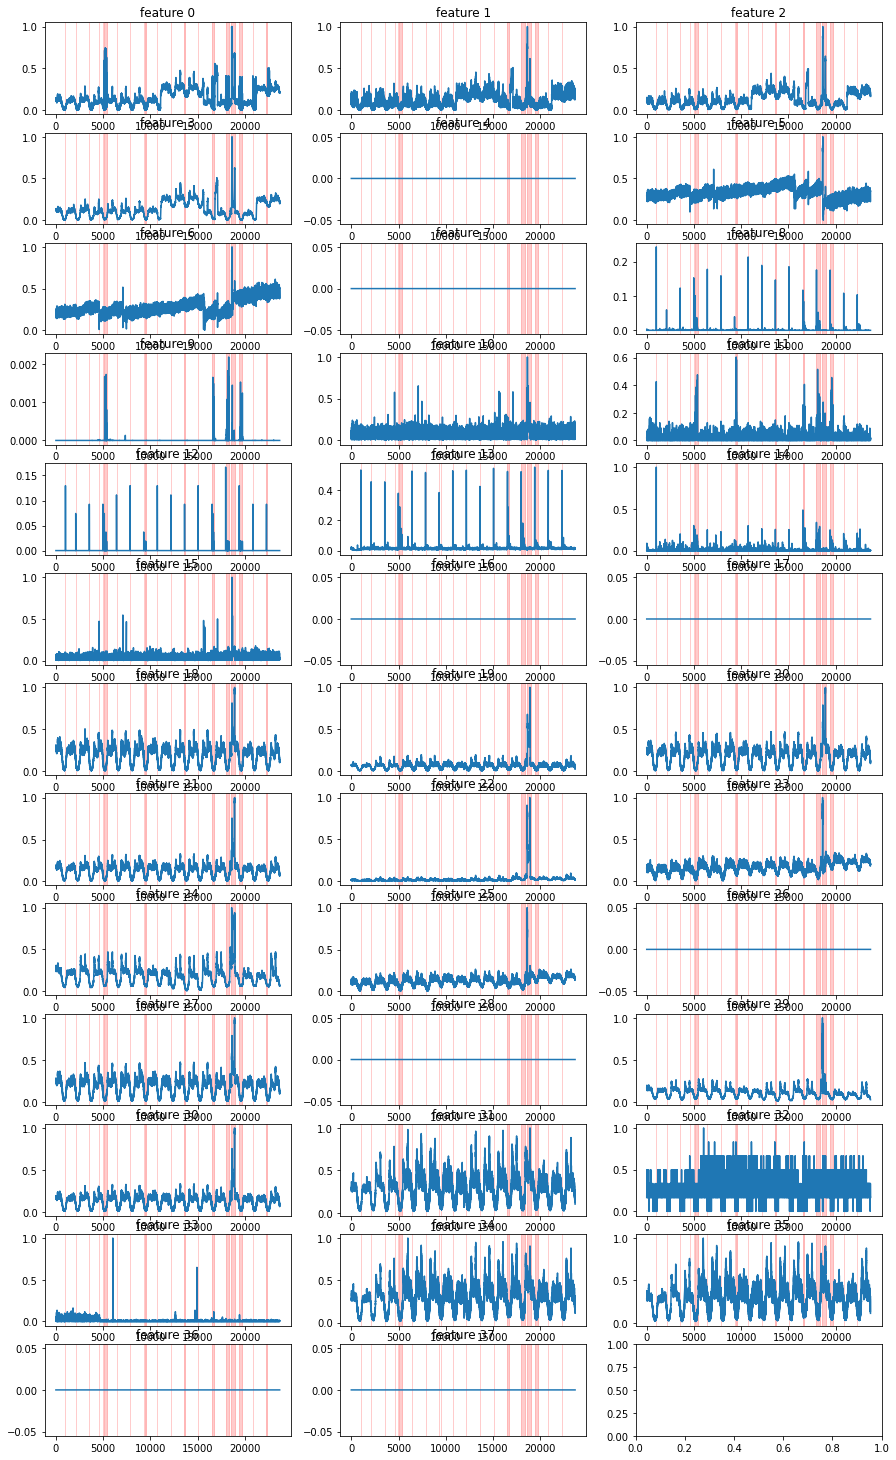

In [15]:
ds_name = 'machine-2-4'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-5

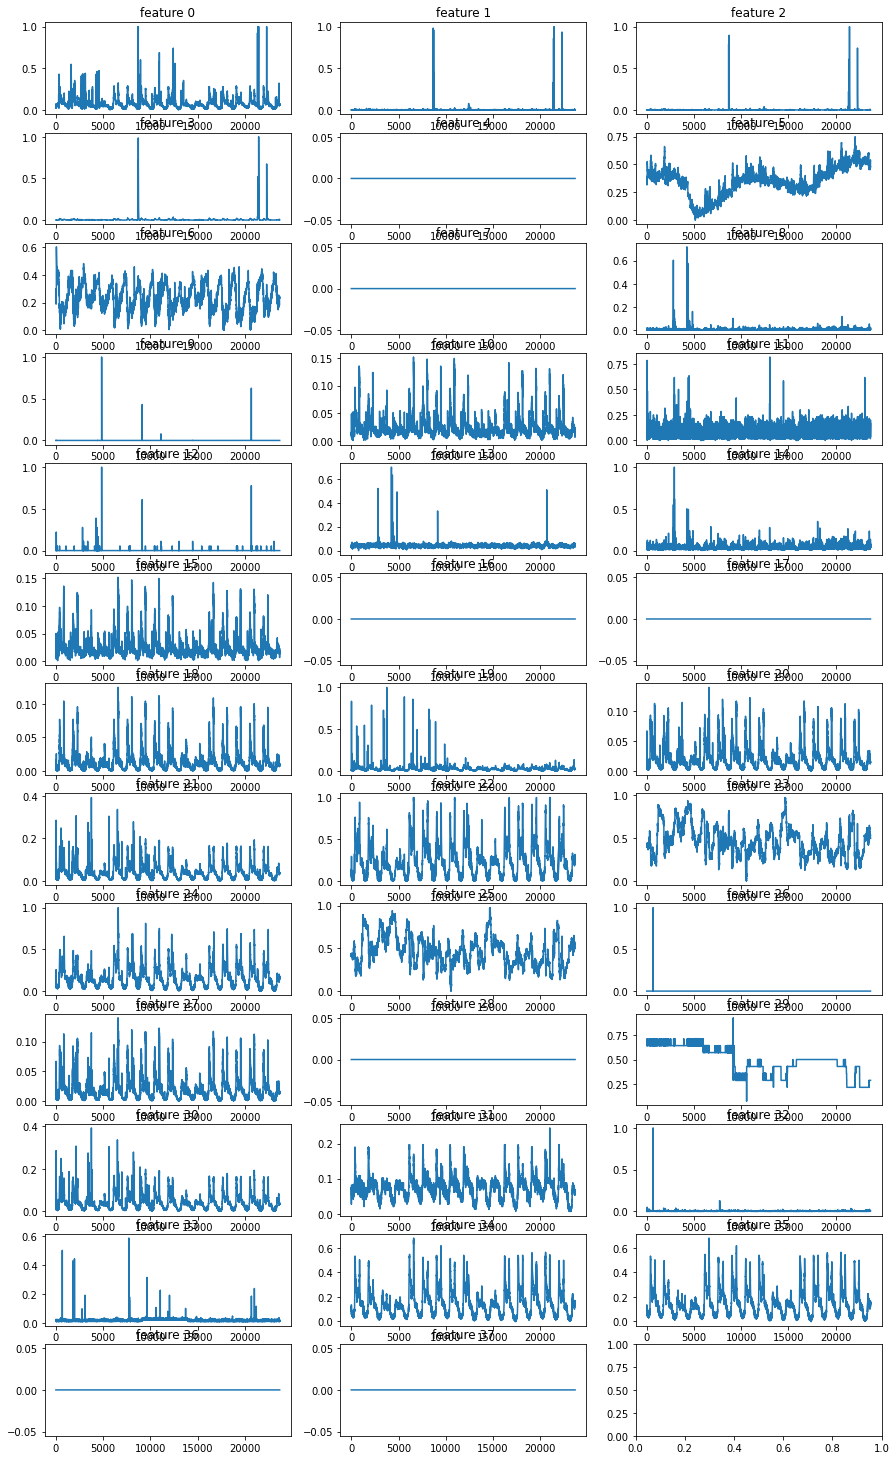

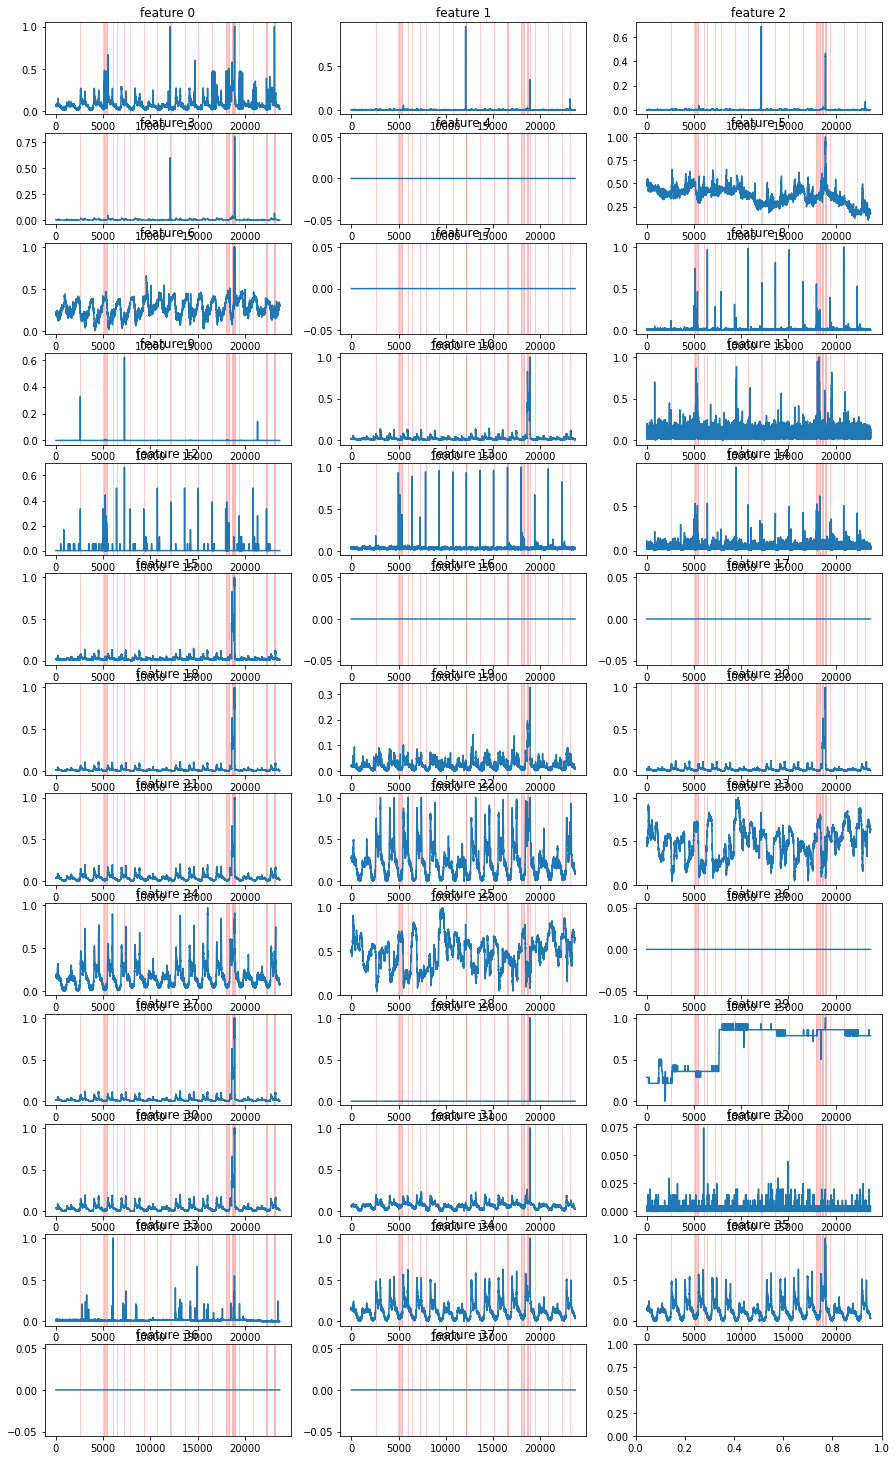

In [16]:
ds_name = 'machine-2-5'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-6

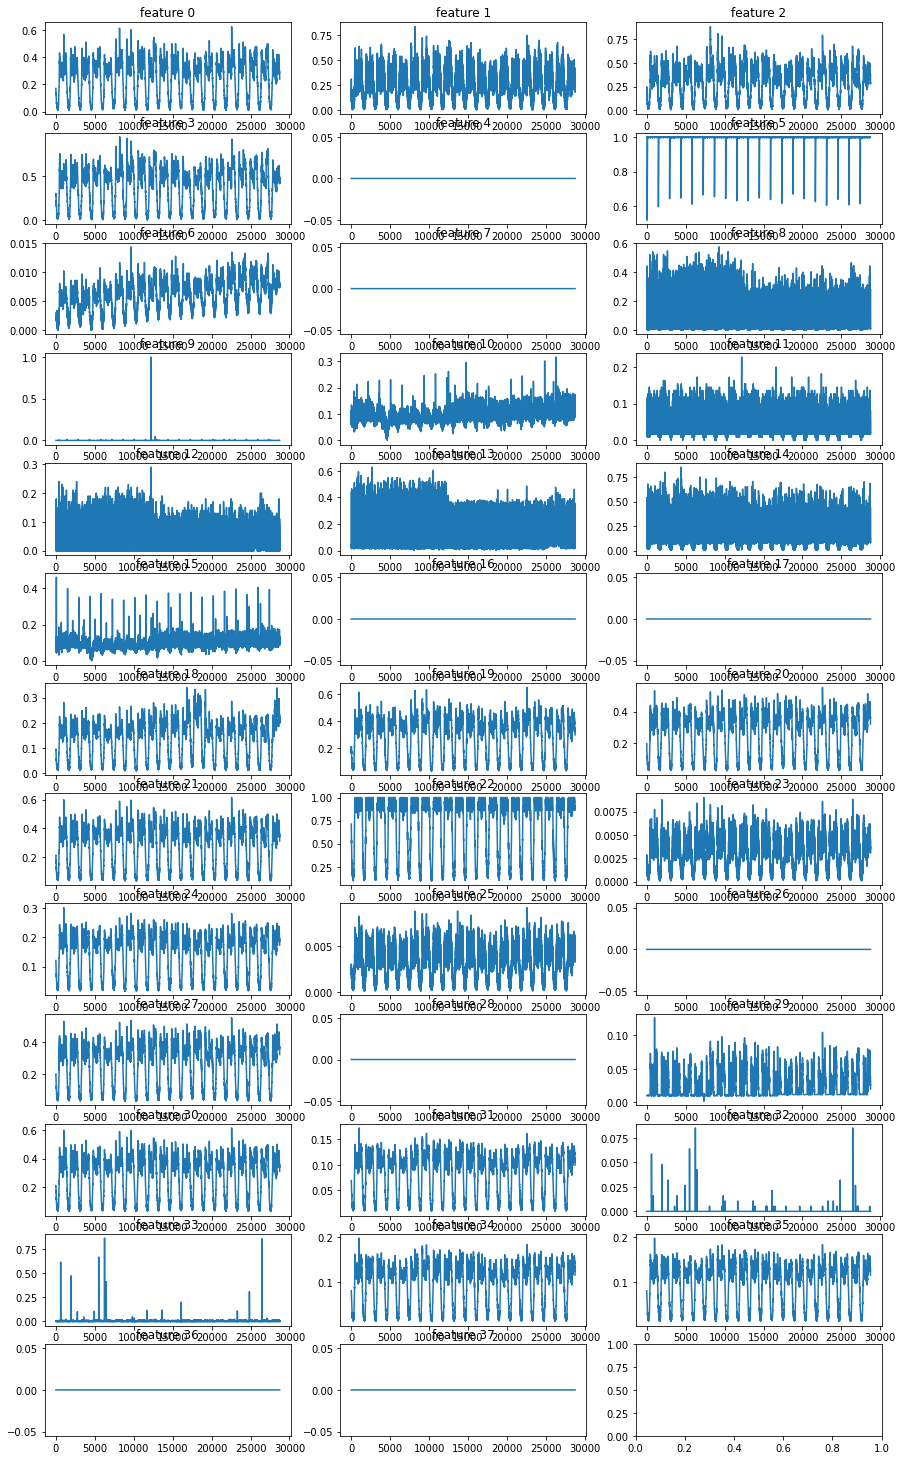

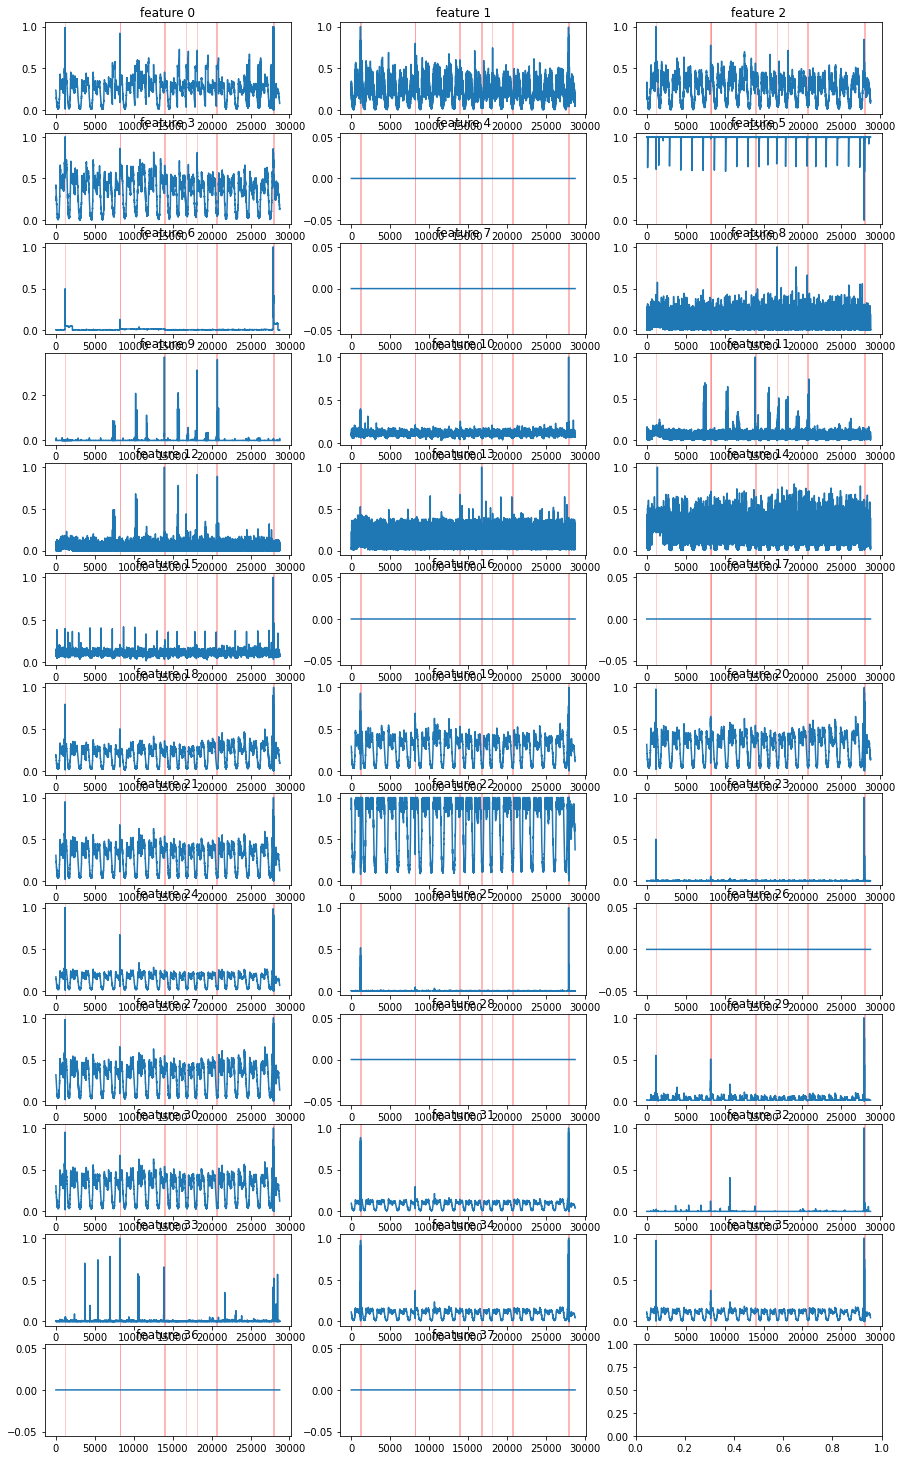

In [17]:
ds_name = 'machine-2-6'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-7

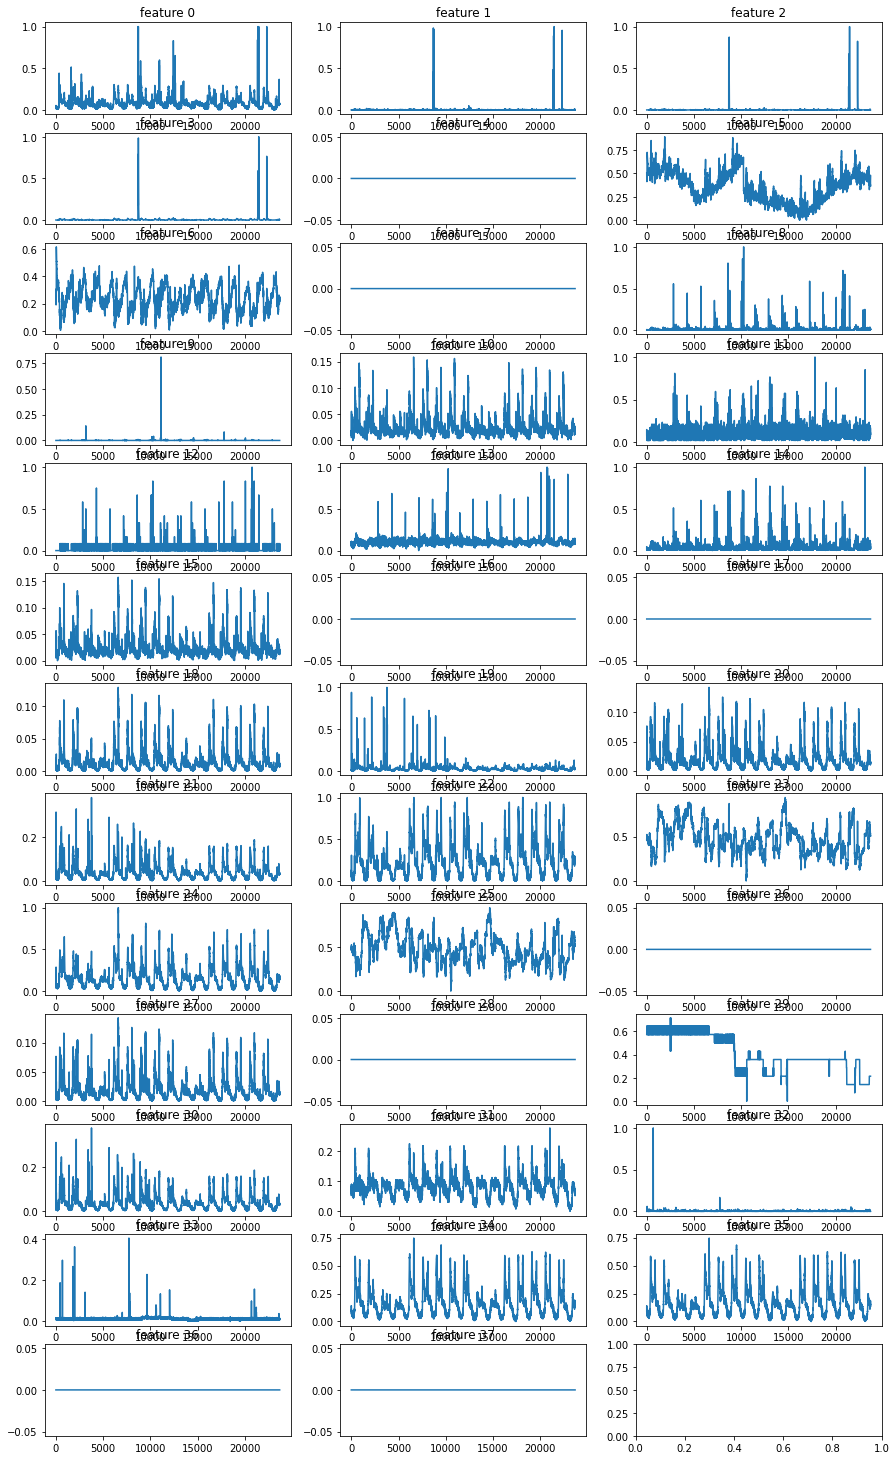

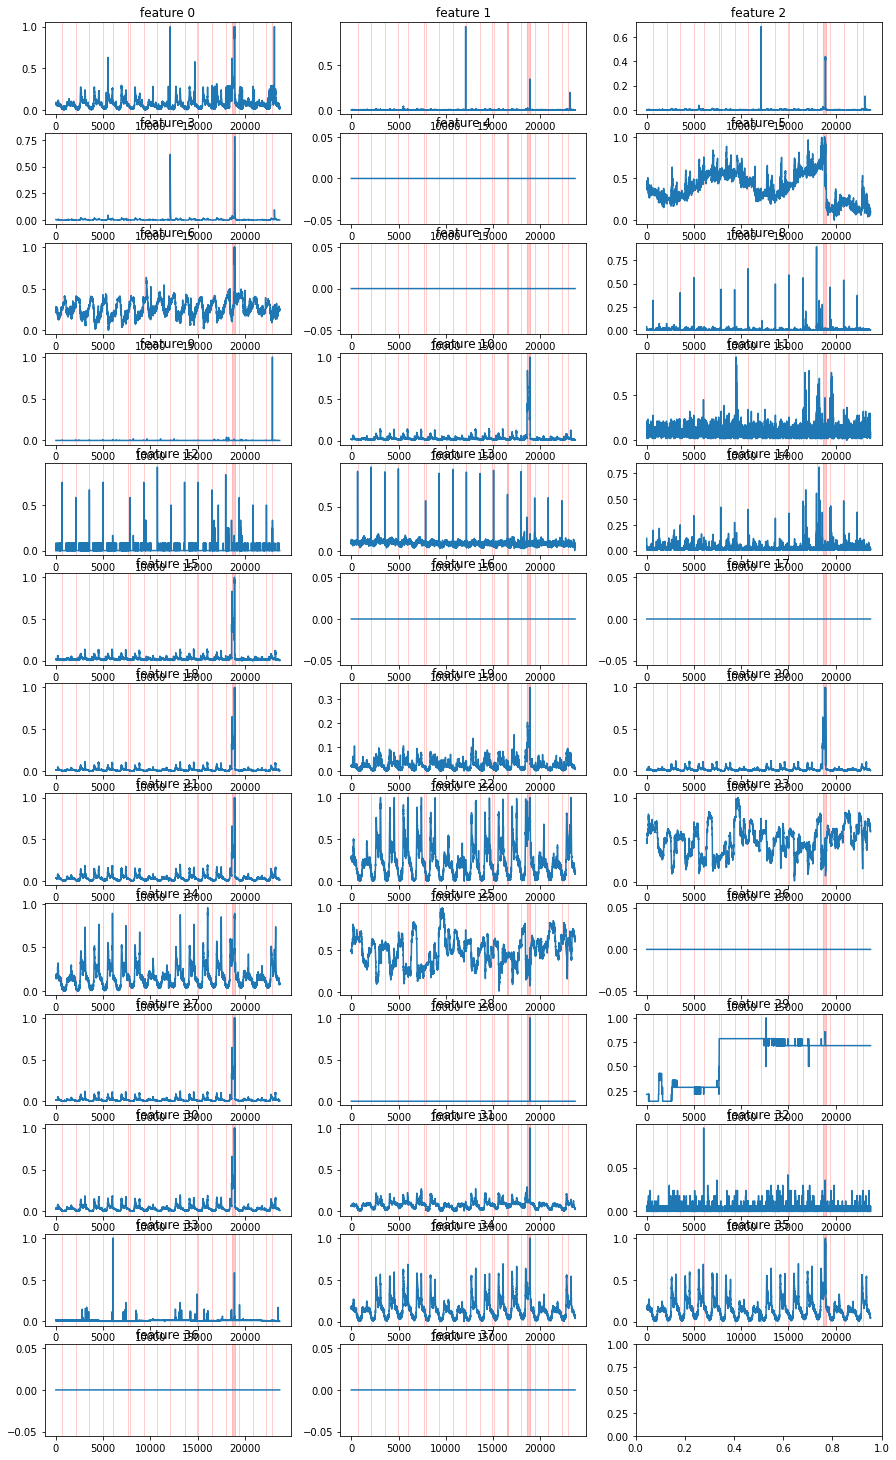

In [18]:
ds_name = 'machine-2-7'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-8

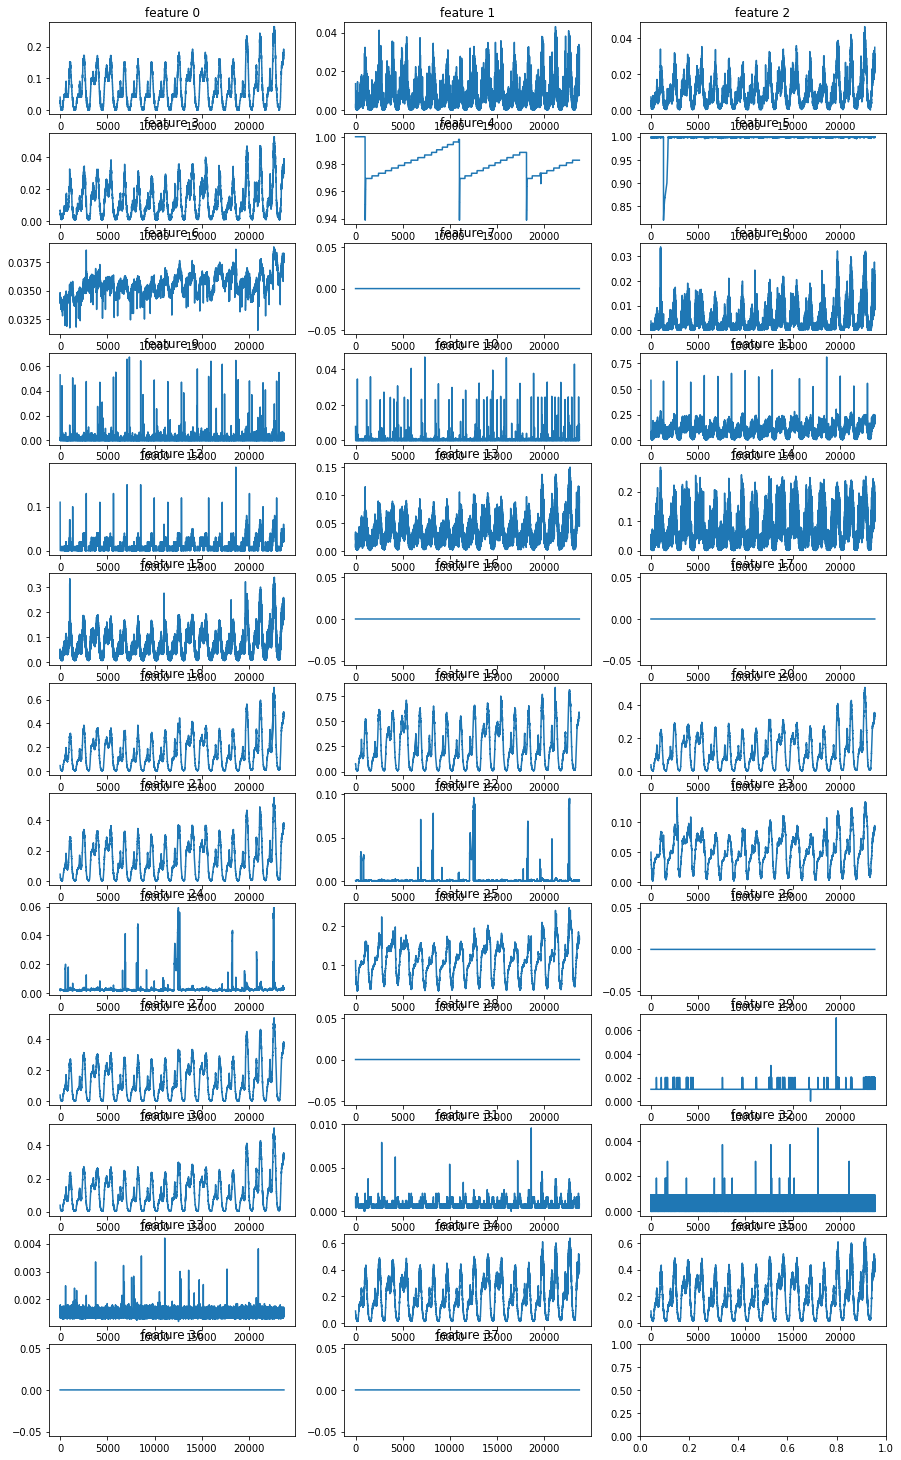

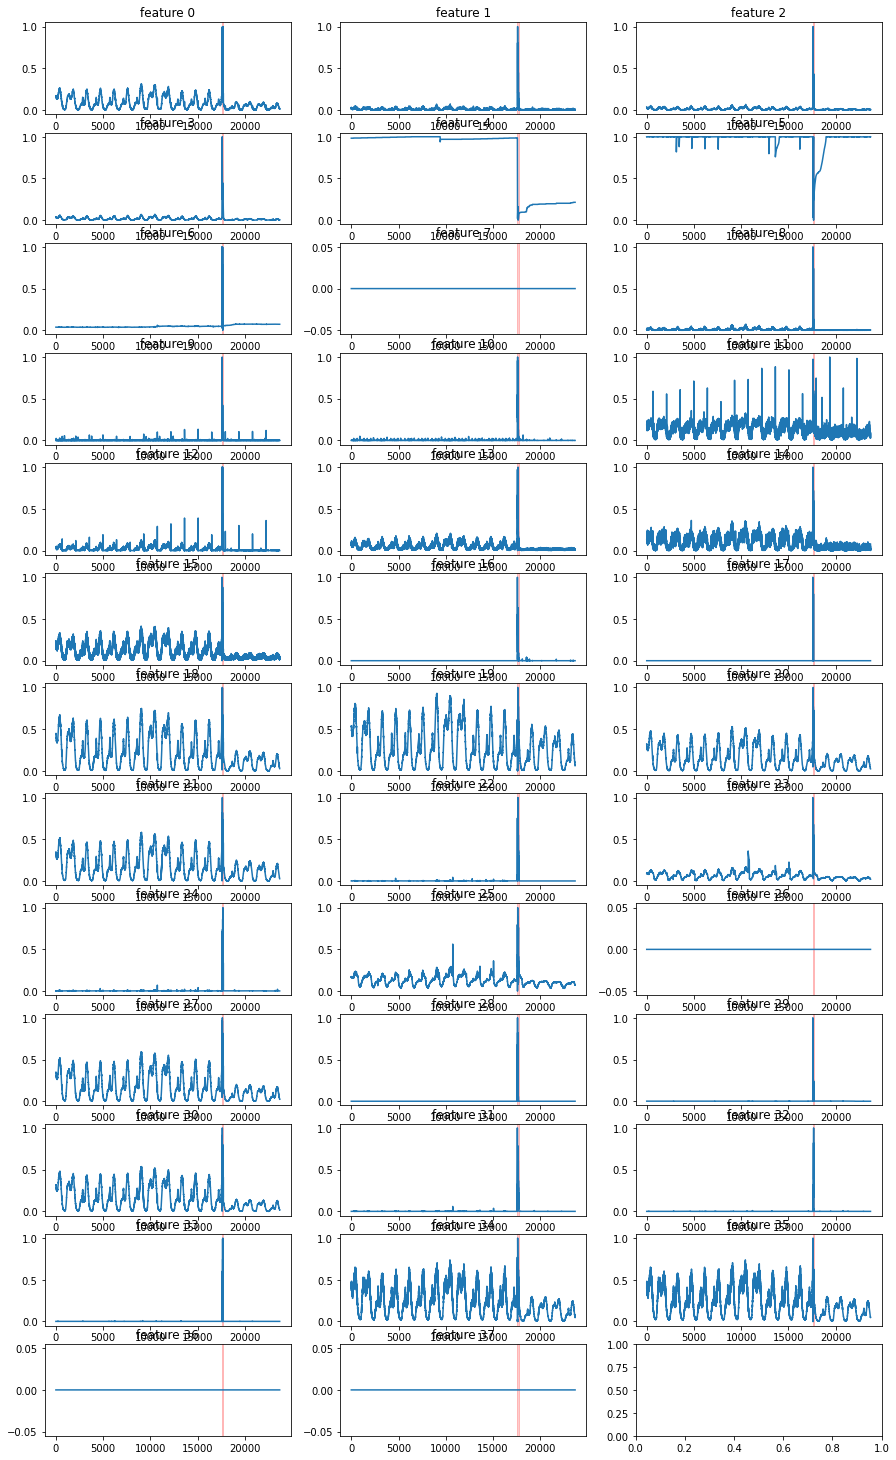

In [19]:
ds_name = 'machine-2-8'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

### Machine-2-9

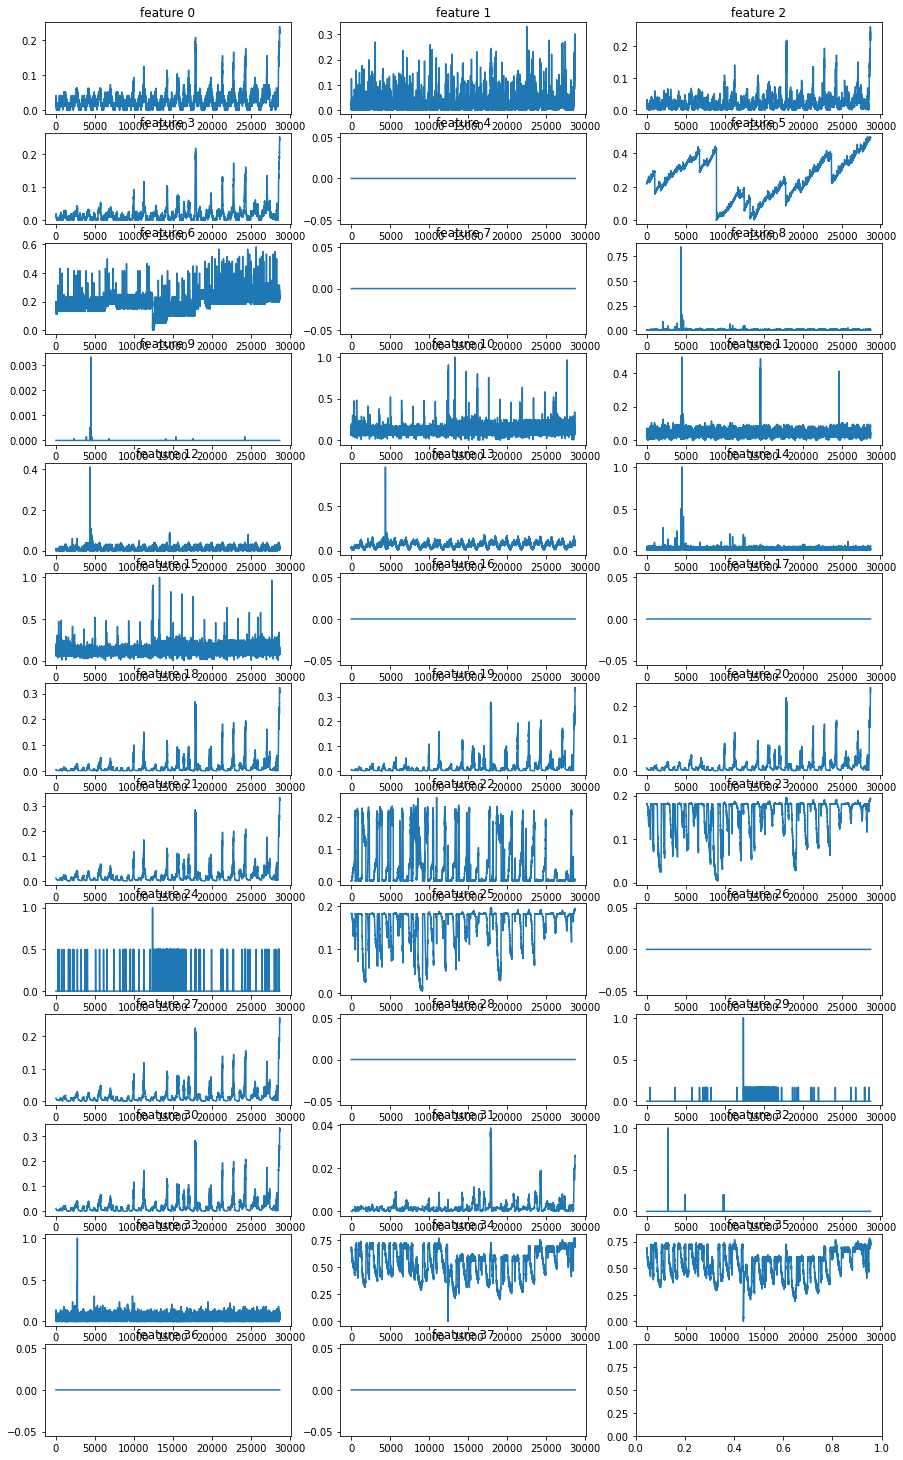

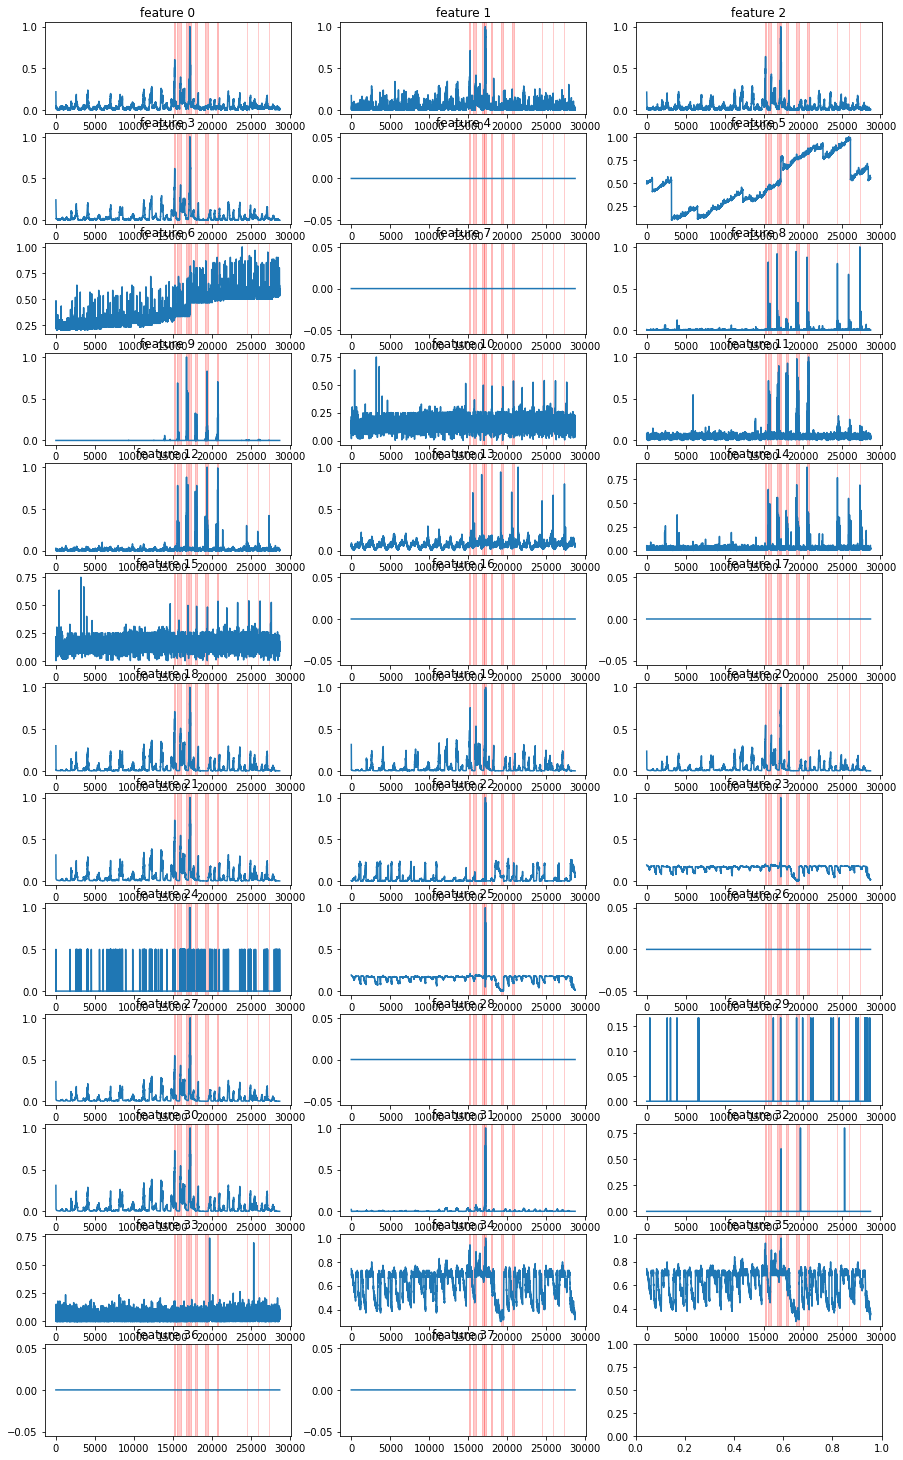

In [20]:
ds_name = 'machine-2-9'
train, test, test_cls = load_ds(ds_name)
plot_ds(train, test, test_cls);

# Group 3